#**TPE : Fundamentos de la ciencia de datos**
Base de datos: calidad_del_agua_2023

Integrantes:
*   Acevedo Belen
*   Artaza Sheila
*   Meresman Eden



Lo primero que realizamos aqui es la descarga de los archivos brindados por la catedra.

In [1]:
!pip install wget
import wget
from os import path, listdir

# ID del archivo en Google Drive
file_id = '1XLWpKSWFimUteORTUizrgKCE8ew7xAet'  # Reemplaza con el ID del archivo CSV
url = f'https://drive.google.com/uc?id={file_id}'

# Nombre del archivo que se va a descargar
filename = 'archivo.csv'

# Verifica si el archivo ya existe
if path.exists(filename):
    print(f'El archivo "{filename}" ya se encuentra descargado.')
else:
    # Si no existe, descarga el archivo
    filename = wget.download(url, filename)
    print(f'\nArchivo descargado: {filename}')

# Chequeamos si los archivos están en el directorio donde estamos parados
lista_archivos = listdir("./")
print(f"El contenido de la carpeta es: {lista_archivos}")


  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9656 sha256=c87ca533ec9e1ac7dd05fd9f21e3237261b31fff2ec9d50fe9b23456ccd62148
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget

Archivo descargado: archivo.csv
El contenido de la carpeta es: ['.config', 'archivo.csv', 'sample_data']


Cambiamos el delimitador a ";" para poder leer correctamente el archivo.csv



In [2]:
import pandas as pd

df = pd.read_csv('archivo.csv', sep=';')

**ANÁLISIS**

Realizamos la vista preliminar del archivo.

In [3]:
print(df)
df.info()
df.describe()
df.head()

     orden                        sitios codigo       fecha   año    campaña  \
0        1  Canal Villanueva y Río Luján  TI001   22/2/2023  2023     Verano   
1        1  Canal Villanueva y Río Luján  TI001   10/5/2023  2023      otoño   
2        1  Canal Villanueva y Río Luján  TI001   23/8/2023  2023   invierno   
3        1  Canal Villanueva y Río Luján  TI001  14/11/2023  2023  primavera   
4        2  Río Lujan y Arroyo Caraguatá  TI006   22/2/2023  2023     Verano   
..     ...                           ...    ...         ...   ...        ...   
164     42           Balneario Municipal  BS094   23/8/2023  2023   invierno   
165     42             Playa La Balandra  BS093   22/2/2023  2023     Verano   
166     42             Playa La Balandra  BS093   10/5/2023  2023      otoño   
167     42             Playa La Balandra  BS093  14/11/2023  2023  primavera   
168     43             Playa La Balandra  BS093   23/8/2023  2023   invierno   

    tem_agua tem_aire    od    ph  ... 

,orden,sitios,codigo,fecha,año,campaña,tem_agua,tem_aire,od,ph,...,dbo_mg_l,dqo_mg_l,turbiedad_ntu,hidr_deriv_petr_ug_l,cr_total_mg_l,cd_total_mg_l,clorofila_a_ug_l,microcistina_ug_l,ica,calidad_de_agua
0,1,Canal Villanueva y Río Luján,TI001,22/2/2023,2023,Verano,26,24,6.59,7.24,...,<2.0,<30,29,<0.10,<0.005,<0.001,0.87,<0.15,53,Muy deteriorada
1,1,Canal Villanueva y Río Luján,TI001,10/5/2023,2023,otoño,18,12,7.09,7.22,...,<2.0,<30,45.00,<0.10,<0.005,<1.0,2.56,<0.15,39,Extremadamente deteriorada
2,1,Canal Villanueva y Río Luján,TI001,23/8/2023,2023,invierno,16.3,11,8.53,7.27,...,<2.0,<30,38,<0.10,<0.005,<0.001,1.02,<0.15,48,Muy deteriorada
3,1,Canal Villanueva y Río Luján,TI001,14/11/2023,2023,primavera,23,25,4.72,6.57,...,<2.0,<30,24,<0.10,<0.005,<0.001,<10.00,<0.15,42,Extremadamente deteriorada
4,2,Río Lujan y Arroyo Caraguatá,TI006,22/2/2023,2023,Verano,26.8,25,5.94,6.96,...,2.1,<30,24,<0.10,<0.005,<0.001,10.61,0.21,39,Extremadamente deteriorada


Realizamos un analisis de las variables para conocer las variables disponibles, para ellos vimos las frecuencias y porcentajes de las distintas variables
Dejamos un ejemplo adjunto.

In [4]:
import pandas as pd

frecuencias = df['sitios'].value_counts()
porcentajes = df['sitios'].value_counts(normalize=True) * 100

print(frecuencias)
print(porcentajes)

sitios
Canal Villanueva y Río Luján                 4
Costanera Hudson Calle 63                    4
Arroyo Sarandí                               4
Costa de Villa Domínico                      4
Arroyo Santo Domingo                         4
Espora 400 m                                 4
Náutico 400 m                                4
Pejerrey Club 400 m                          4
Calle 14 y Costa - Salida cloaca             4
Puerto Trinidad calle 47                     4
Boca Cerrada (Res.Nat. Punta Lara)           4
Escollera de Propaneros                      4
Camping Eva Perón                            4
Toma de agua Club de Pesca                   4
Arroyo El Gato                               4
Ensenada Prefectura Isla Santiago            4
Balneario Palo Blanco                        4
Diagonal 66 (descarga cloaca)                4
Playa La Bagliardi                           4
Balneario Municipal                          4
Polo Petroquímico Dock Sud                   4
Playa 

Contamos la cantidad de Nans por variable.

In [5]:
import pandas as pd
cantidad_nulos = df.isna().sum()
print(cantidad_nulos)

orden                       0
sitios                      0
codigo                      0
fecha                       0
año                         0
campaña                     0
tem_agua                    0
tem_aire                    0
od                          0
ph                          1
olores                      0
color                       0
espumas                     0
mat_susp                    0
colif_fecales_ufc_100ml     0
escher_coli_ufc_100ml       0
enteroc_ufc_100ml           0
nitrato_mg_l                0
nh4_mg_l                    0
p_total_l_mg_l              1
fosf_ortofos_mg_l           0
dbo_mg_l                    1
dqo_mg_l                    0
turbiedad_ntu               0
hidr_deriv_petr_ug_l        0
cr_total_mg_l               0
cd_total_mg_l               0
clorofila_a_ug_l            0
microcistina_ug_l           0
ica                         1
calidad_de_agua            15
dtype: int64


Copiamos el archivo para preservar los datos.

In [6]:
base_limpia = df.copy()

**LIMPIEZA**

Borramos las columnas "codigo", "año", "fecha", "sitios",  que no consideramos necesarias para el análisis.

In [7]:
base_limpia = base_limpia.drop(columns=['codigo'])
base_limpia = base_limpia.drop(columns=['año'])



Reemplazamos con Nans los valores que no brindaban información como "no se muestreó" para cada una de las variables.

In [8]:
valores_a_reemplazar = ['en obra', 'no se midió', 'no se muestreó','no muestreó', 'sin equipo', 'inaccesible']
base_limpia['tem_agua'] = base_limpia['tem_agua'].replace(valores_a_reemplazar, pd.NA)

valores_a_reemplazar = ['en obra', 'no se midió', 'no se muestreó','no muestreó', 'sin equipo', 'inaccesible']
base_limpia['tem_aire'] = base_limpia['tem_aire'].replace(valores_a_reemplazar, pd.NA)

valores_a_reemplazar = ['en obra', 'no se midió', 'no se muestreó','no muestreó', 'sin equipo', 'inaccesible']
base_limpia['od'] = base_limpia['od'].replace(valores_a_reemplazar, pd.NA)

valores_a_reemplazar = ['en obra', 'no se midió', 'no se muestreó','no muestreó', 'sin equipo', 'inaccesible', 'no funcionó', '-', ' ']
base_limpia['ph'] = base_limpia['ph'].replace(valores_a_reemplazar, pd.NA)

valores_a_reemplazar = ['en obra', 'no se midió', 'no se muestreó','no muestreó', 'inaccesible']
base_limpia['olores'] = base_limpia['olores'].replace(valores_a_reemplazar, pd.NA)

valores_a_reemplazar = ['en obra', 'no se midió', 'no se muestreó','no muestreó', 'inaccesible']
base_limpia['color'] = base_limpia['color'].replace(valores_a_reemplazar, pd.NA)

valores_a_reemplazar = ['en obra', 'no se midió', 'no se muestreó','no muestreó', 'inaccesible']
base_limpia['espumas'] = base_limpia['espumas'].replace(valores_a_reemplazar, pd.NA)

valores_a_reemplazar = ['en obra', 'no se midió', 'no se muestreó','no muestreó', 'inaccesible']
base_limpia['mat_susp'] = base_limpia['mat_susp'].replace(valores_a_reemplazar, pd.NA)

valores_a_reemplazar = ['en obra', 'no se midió', 'no se muestreó','no muestreó','envase sin muestra', 'sin muestra', 'inaccesible']
base_limpia['colif_fecales_ufc_100ml'] = base_limpia['colif_fecales_ufc_100ml'].replace(valores_a_reemplazar, pd.NA)

valores_a_reemplazar = ['en obra', 'no se midió', 'no se muestreó','no muestreó','envase sin muestra', 'sin muestra', 'inaccesible']
base_limpia['escher_coli_ufc_100ml'] = base_limpia['escher_coli_ufc_100ml'].replace(valores_a_reemplazar, pd.NA)

valores_a_reemplazar = ['en obra', 'no se midió', 'no se muestreó','no muestreó','envase sin muestra', 'sin muestra', 'inaccesible']
base_limpia['enteroc_ufc_100ml'] = base_limpia['enteroc_ufc_100ml'].replace(valores_a_reemplazar, pd.NA)

valores_a_reemplazar = ['en obra', 'no se midió', 'no se muestreó','no muestreó', 'inaccesible']
base_limpia['nitrato_mg_l'] = base_limpia['nitrato_mg_l'].replace(valores_a_reemplazar, pd.NA)

valores_a_reemplazar = ['en obra', 'no se midió', 'no se muestreó','no muestreó', 'inaccesible']
base_limpia['nh4_mg_l'] = base_limpia['nh4_mg_l'].replace(valores_a_reemplazar, pd.NA)

valores_a_reemplazar = ['en obra', 'no se midió', 'no se muestreó','no muestreó', 'inaccesible', ' ']
base_limpia['p_total_l_mg_l'] = base_limpia['p_total_l_mg_l'].replace(valores_a_reemplazar, pd.NA)

valores_a_reemplazar = ['en obra', 'no se midió', 'no se muestreó','no muestreó', 'inaccesible', 'sin muestra']
base_limpia['fosf_ortofos_mg_l'] = base_limpia['fosf_ortofos_mg_l'].replace(valores_a_reemplazar, pd.NA)

valores_a_reemplazar = ['en obra', 'no se midió', 'no se muestreó','no muestreó', 'inaccesible']
base_limpia['dbo_mg_l'] = base_limpia['dbo_mg_l'].replace(valores_a_reemplazar, pd.NA)

valores_a_reemplazar = ['en obra', 'no se midió', 'no se muestreó','no muestreó', 'inaccesible']
base_limpia['dqo_mg_l'] = base_limpia['dqo_mg_l'].replace(valores_a_reemplazar, pd.NA)

valores_a_reemplazar = ['en obra', 'no se midió', 'no se muestreó','no muestreó', 'inaccesible']
base_limpia['turbiedad_ntu'] = base_limpia['turbiedad_ntu'].replace(valores_a_reemplazar, pd.NA)

valores_a_reemplazar = ['en obra', 'no se midió', 'no se muestreó','no muestreó', 'inaccesible','sin muestra']
base_limpia['hidr_deriv_petr_ug_l'] = base_limpia['hidr_deriv_petr_ug_l'].replace(valores_a_reemplazar, pd.NA)

valores_a_reemplazar = ['en obra', 'no se midió', 'no se muestreó','no muestreó', 'inaccesible']
base_limpia['cr_total_mg_l'] = base_limpia['cr_total_mg_l'].replace(valores_a_reemplazar, pd.NA)

valores_a_reemplazar = ['en obra', 'no se midió', 'no se muestreó','no muestreó', 'inaccesible']
base_limpia['cd_total_mg_l'] = base_limpia['cd_total_mg_l'].replace(valores_a_reemplazar, pd.NA)

valores_a_reemplazar = ['en obra', 'no se midió', 'no se muestreó','no muestreó', 'inaccesible', 'falto un frasco']
base_limpia['clorofila_a_ug_l'] = base_limpia['clorofila_a_ug_l'].replace(valores_a_reemplazar, pd.NA)

valores_a_reemplazar = ['en obra', 'no se midió', 'no se muestreó','no muestreó', 'inaccesible', 'Dato atípico']
base_limpia['microcistina_ug_l'] = base_limpia['microcistina_ug_l'].replace(valores_a_reemplazar, pd.NA)

valores_a_reemplazar = ['en obra', 'no se midió', 'no se muestreó','no muestreó', 'inaccesible', 'N/A', 'no se pudo calcular']
base_limpia['ica'] = base_limpia['ica'].replace(valores_a_reemplazar, pd.NA)

valores_a_reemplazar = ['en obra', ' ' ,'no se midió', 'no se muestreó','no muestreó', 'inaccesible']
base_limpia['calidad_de_agua'] = base_limpia['calidad_de_agua'].replace(valores_a_reemplazar, pd.NA)

Contamos nuevamente la cantidad de Nans de cada variable.

In [9]:
base_limpia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   orden                    169 non-null    int64 
 1   sitios                   169 non-null    object
 2   fecha                    169 non-null    object
 3   campaña                  169 non-null    object
 4   tem_agua                 138 non-null    object
 5   tem_aire                 142 non-null    object
 6   od                       135 non-null    object
 7   ph                       125 non-null    object
 8   olores                   151 non-null    object
 9   color                    151 non-null    object
 10  espumas                  151 non-null    object
 11  mat_susp                 151 non-null    object
 12  colif_fecales_ufc_100ml  144 non-null    object
 13  escher_coli_ufc_100ml    144 non-null    object
 14  enteroc_ufc_100ml        144 non-null    o

Eliminamos los "<" y ">" de las variables que los poseian. Además las convertimos a un tipo númerico.

In [10]:
base_limpia['nitrato_mg_l'] = pd.to_numeric(
    base_limpia['nitrato_mg_l'].replace({'<2.0': '2.0','<44': '44'}, regex=True),
    errors='coerce'
)
base_limpia['nh4_mg_l'] = pd.to_numeric(
    base_limpia['nh4_mg_l'].replace({'<0.05': '0.05','<0.1':'0.1','<0.78':'0.78'}, regex=True),
    errors='coerce'
)
base_limpia['p_total_l_mg_l'] = pd.to_numeric(
    base_limpia['p_total_l_mg_l'].replace({'<0.10': '0.10'}, regex=True),
    errors='coerce'
)
base_limpia['fosf_ortofos_mg_l'] = pd.to_numeric(
        base_limpia['fosf_ortofos_mg_l'].replace({'<0.20': '0.20','<0.10':'0.10'}, regex=True),
        errors='coerce'
    )
base_limpia['hidr_deriv_petr_ug_l'] = pd.to_numeric(
        base_limpia['hidr_deriv_petr_ug_l'].replace({'<0.10': '0.10'}, regex=True),
        errors='coerce'
    )
base_limpia['cr_total_mg_l'] = pd.to_numeric(
        base_limpia['cr_total_mg_l'].replace({'<0.005': '0.005'}, regex=True),
        errors='coerce'
    )
base_limpia['cd_total_mg_l'] = pd.to_numeric(
        base_limpia['cd_total_mg_l'].replace({'<0.001': '0.001', '<1.0':'1.0'}, regex=True),
        errors='coerce'
    )
base_limpia['clorofila_a_ug_l'] = pd.to_numeric(
        base_limpia['clorofila_a_ug_l'].replace({'<10.00': '10.00','<0.10':'0.10'}, regex=True),
        errors='coerce'
    )
base_limpia['dbo_mg_l'] = pd.to_numeric(
        base_limpia['dbo_mg_l'].replace({'<2.0': '2.0', '<5' :'5'}, regex=True),
        errors='coerce'
    )
base_limpia['dqo_mg_l'] = pd.to_numeric(
        base_limpia['dqo_mg_l'].replace({'<30': '30','<50':'50'}, regex=True),
        errors='coerce'
    )
base_limpia['microcistina_ug_l'] = pd.to_numeric(
        base_limpia['microcistina_ug_l'].replace({ '<0.15': '0.15', '>5.00' : '5.00'}, regex=True),
        errors='coerce'
    )

Convertimos las variables cualitativas en binarias.

In [11]:
base_limpia['olores'] = base_limpia['olores'].replace({'Ausencia':0, 'Presencia' : 1})
base_limpia['color'] = base_limpia['color'].replace({'Ausencia':0, 'Presencia' : 1})
base_limpia['espumas'] = base_limpia['espumas'].replace({'Ausencia':0, 'Presencia' : 1})
base_limpia['mat_susp'] = base_limpia['mat_susp'].replace({'Ausencia':0, 'Presencia' : 1})
base_limpia['calidad_de_agua'] = base_limpia['calidad_de_agua'].replace({'Muy deteriorada':0, 'Extremadamente deteriorada' : 1})

Copiamos la base limpia, para continuar con la exploración. Eliminamos las filas que poseen mas del 60% de sus valores con Nans.

Además copiamos los valores de la variable "campaña" para luego eliminarla.

In [12]:
base_sindicotomicas = base_limpia.copy()
import pandas as pd
umbral = 0.4  # 1 - 0.6 (60%)

base_sindicotomicas = base_sindicotomicas.dropna(thresh=int(umbral * base_sindicotomicas.shape[1]))
campaña = base_sindicotomicas['campaña']
base_sindicotomicas = base_sindicotomicas.drop(columns=['campaña'])


Convertimos todos los valores de la matriz a formato float y utilizamos el comando coerce para que convierta los valores que no se pueden procesar en Nan en lugar de generar un error.

In [13]:
import pandas as pd
for col in base_sindicotomicas.columns:
    if base_sindicotomicas[col].dtype == 'object':
        base_sindicotomicas[col] = pd.to_numeric(base_sindicotomicas[col] , errors = 'coerce')

Realizamos imputación por el algoritmo de vecinos más cercanos para todas las filas que poseian en alguna de sus variables un Nan, debido a que no tenian distribución normal.
El valor de vecinos elegido fue k=7.

In [14]:
from sklearn.impute import KNNImputer
import pandas as pd

columnas_no_normales = ['tem_agua', 'tem_aire', 'colif_fecales_ufc_100ml', 'escher_coli_ufc_100ml',
    'enteroc_ufc_100ml', 'p_total_l_mg_l', 'fosf_ortofos_mg_l', 'dbo_mg_l',
    'clorofila_a_ug_l', 'microcistina_ug_l', 'ica','hidr_deriv_petr_ug_l','calidad_de_agua','ph','od']

imputer = KNNImputer(n_neighbors=7)
#imputa las columnas seleccionadas
base_sindicotomicas[columnas_no_normales] = imputer.fit_transform(base_sindicotomicas[columnas_no_normales])

In [15]:
#eliminamos las variables que no utilizaremos
base_sindicotomicas = base_sindicotomicas.drop(columns=['sitios'])
base_sindicotomicas = base_sindicotomicas.drop(columns=['fecha'])
base_sindicotomicas = base_sindicotomicas.drop(columns=['orden'])

Para revisar que se haya imputado correctamente contamos la cantidad de Nans de las variables afectadas.

In [16]:
cantidad_nulos = base_sindicotomicas.isna().sum()
print("Cantidad de valores NaN por variable:")
cantidad_nulos

Cantidad de valores NaN por variable:


,0
tem_agua,0
tem_aire,0
od,0
ph,0
olores,0
color,0
espumas,0
mat_susp,0
colif_fecales_ufc_100ml,0
escher_coli_ufc_100ml,0


Guardamos la base limpia con las variables dicotomicas. Y luego borramos las columnas cualitativas(dicotomicas) de la copia para poder realizar la matriz de correlacion. Además eliminamos la variable continua (que posee un único valor constante) "hidr_deriv_petr_ug_l".


In [17]:
base_completa = base_sindicotomicas

In [18]:
base_sindicotomicas = base_sindicotomicas.drop(columns=['hidr_deriv_petr_ug_l'])
base_sindicotomicas = base_sindicotomicas.drop(columns=['olores'])
base_sindicotomicas = base_sindicotomicas.drop(columns=['color'])
base_sindicotomicas = base_sindicotomicas.drop(columns=['espumas'])
base_sindicotomicas = base_sindicotomicas.drop(columns=['mat_susp'])
base_sindicotomicas = base_sindicotomicas.drop(columns=['calidad_de_agua'])

**EXPLORACIÓN**

Realizamos los histogramas de las variables cuantitativas para conocer su distribución.

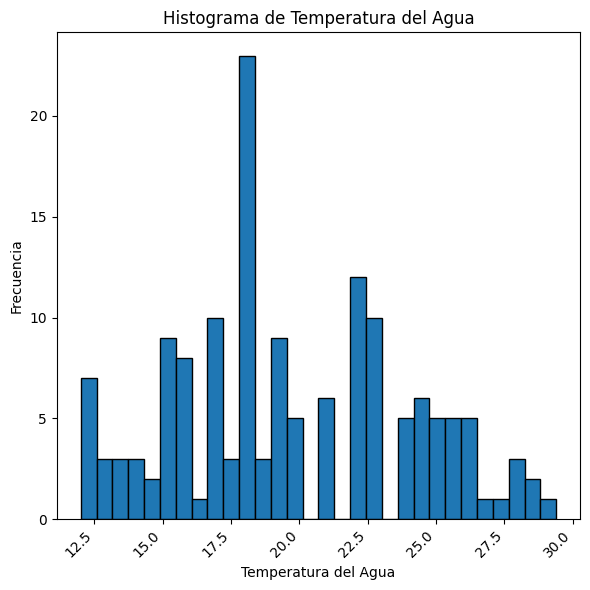

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
plt.hist(base_sindicotomicas['tem_agua'], bins=30, edgecolor='black')
plt.xlabel('Temperatura del Agua')
plt.ylabel('Frecuencia')
plt.title('Histograma de Temperatura del Agua')
plt.xticks(rotation=45, ha='right') # rotar las etiquetas
plt.tight_layout() # ajustar el diseño para evitar superposiciones
plt.show()

Sesgado a izquierda

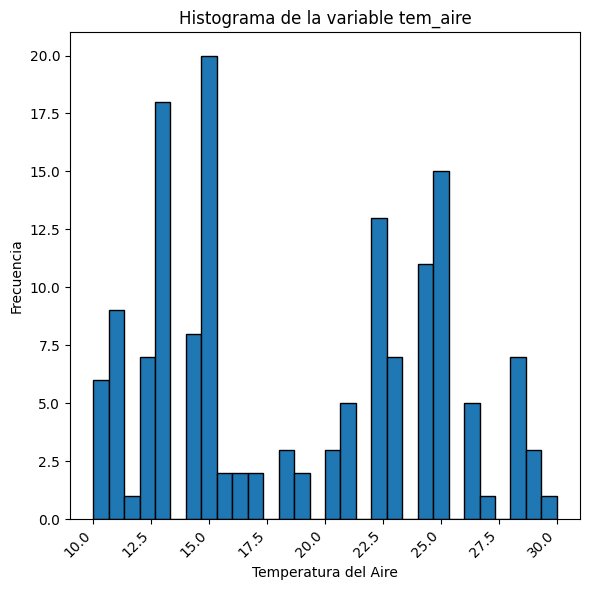

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
plt.hist(base_sindicotomicas['tem_aire'], bins=30, edgecolor='black')
plt.xlabel('Temperatura del Aire')
plt.ylabel('Frecuencia')
plt.title('Histograma de la variable tem_aire')
plt.xticks(rotation=45, ha='right') # rotar las etiquetas
plt.tight_layout() #ajustar el diseño
plt.show()

Comportamiento bimodal

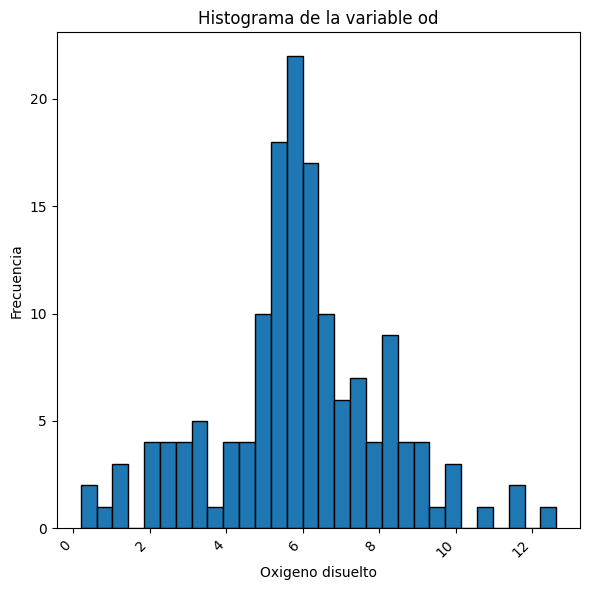

In [21]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 6))
plt.hist(base_sindicotomicas['od'], bins=30, edgecolor='black')
plt.xlabel('Oxigeno disuelto')
plt.ylabel('Frecuencia')
plt.title('Histograma de la variable od')
plt.xticks(rotation=45, ha='right') #rotar las etiquetas
plt.tight_layout() #ajustar el diseño
plt.show()

Comportamiento levemente sesgado a izquierda

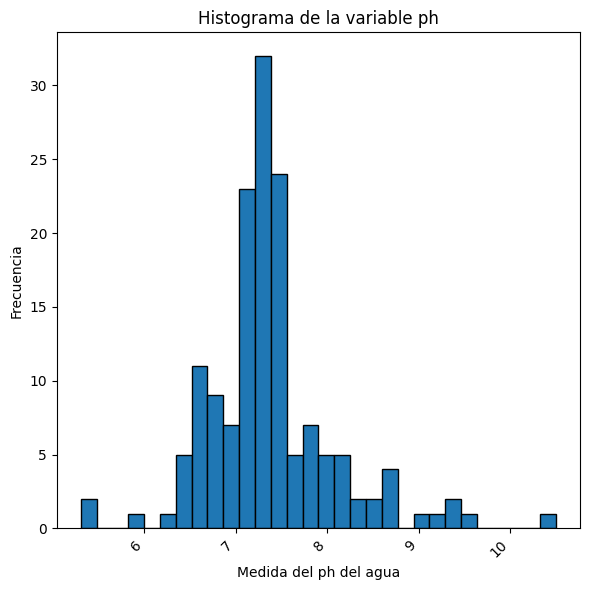

In [22]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 6))
plt.hist(base_sindicotomicas['ph'], bins=30, edgecolor='black')
plt.xlabel('Medida del ph del agua')
plt.ylabel('Frecuencia')
plt.title('Histograma de la variable ph')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Comportamiento levemente sesgado a izquierda

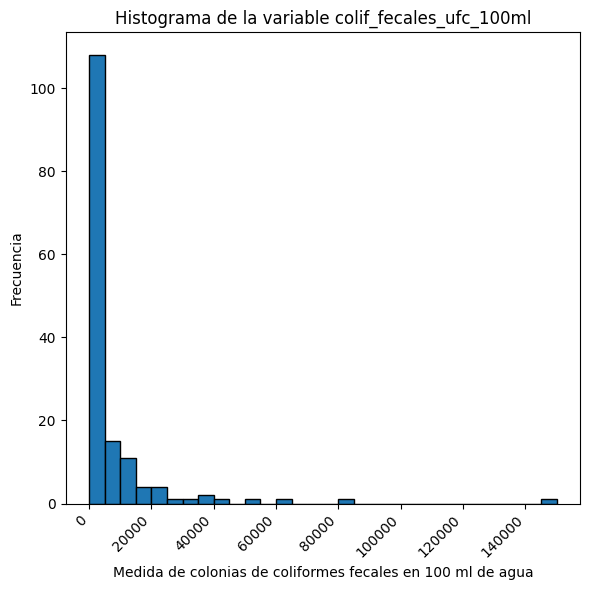

In [23]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 6))
plt.hist(base_sindicotomicas['colif_fecales_ufc_100ml'], bins=30, edgecolor='black')
plt.xlabel('Medida de colonias de coliformes fecales en 100 ml de agua')
plt.ylabel('Frecuencia')
plt.title('Histograma de la variable colif_fecales_ufc_100ml')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Muestra una frecuencia alta en torno a valores colonias coliformes fecales  bajos

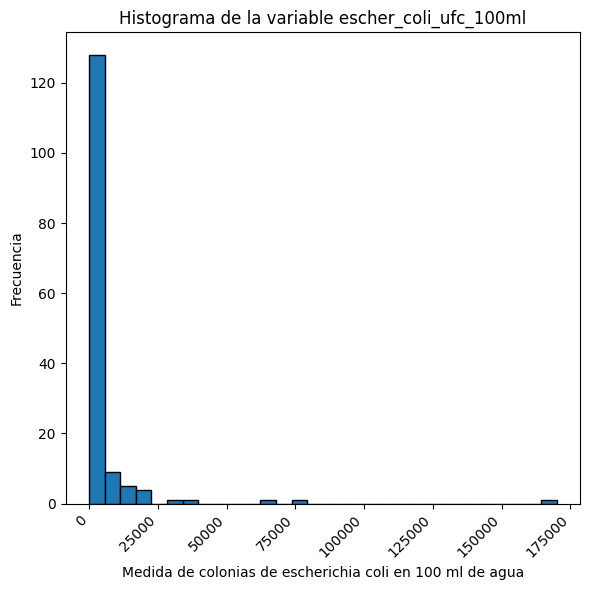

In [24]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 6))
plt.hist(base_sindicotomicas['escher_coli_ufc_100ml'], bins=30, edgecolor='black')
plt.xlabel('Medida de colonias de escherichia coli en 100 ml de agua')
plt.ylabel('Frecuencia')
plt.title('Histograma de la variable escher_coli_ufc_100ml')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Muestra una frecuencia alta en torno a valores de colonias de escherichia coli bajos

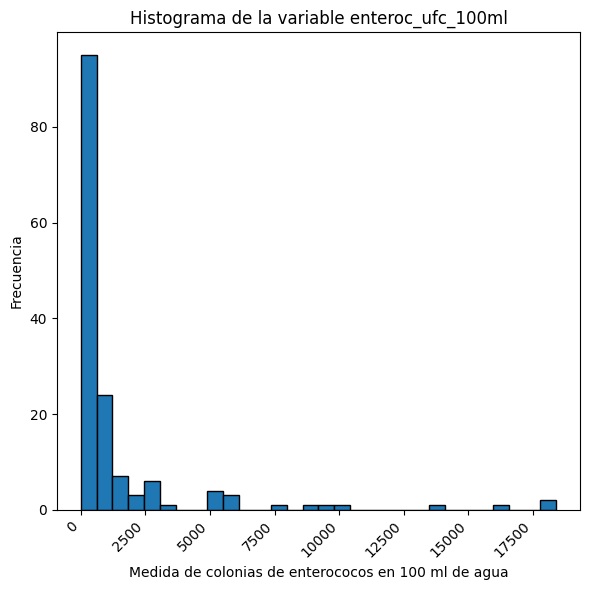

In [25]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 6))
plt.hist(base_sindicotomicas['enteroc_ufc_100ml'], bins=30, edgecolor='black')
plt.xlabel('Medida de colonias de enterococos en 100 ml de agua')
plt.ylabel('Frecuencia')
plt.title('Histograma de la variable enteroc_ufc_100ml')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Muestra una frecuencia alta en torno a valores de colonias de enterococos bajos

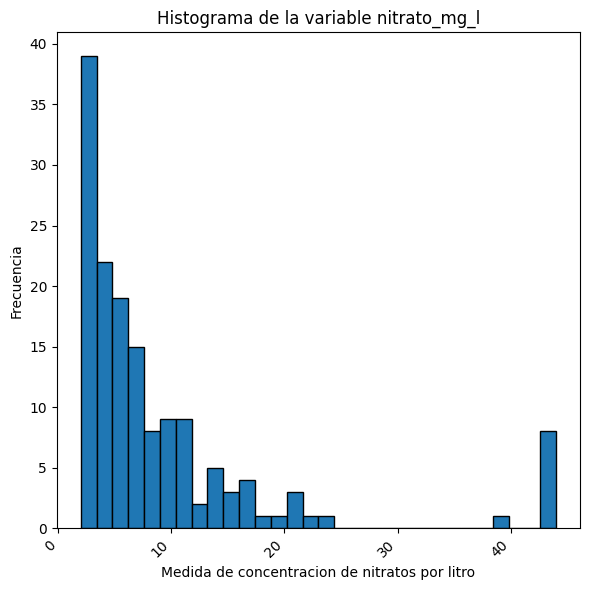

In [26]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 6))
plt.hist(base_sindicotomicas['nitrato_mg_l'], bins=30, edgecolor='black')
plt.xlabel('Medida de concentracion de nitratos por litro')
plt.ylabel('Frecuencia')
plt.title('Histograma de la variable nitrato_mg_l')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Comportamiento sesgado a izquierda

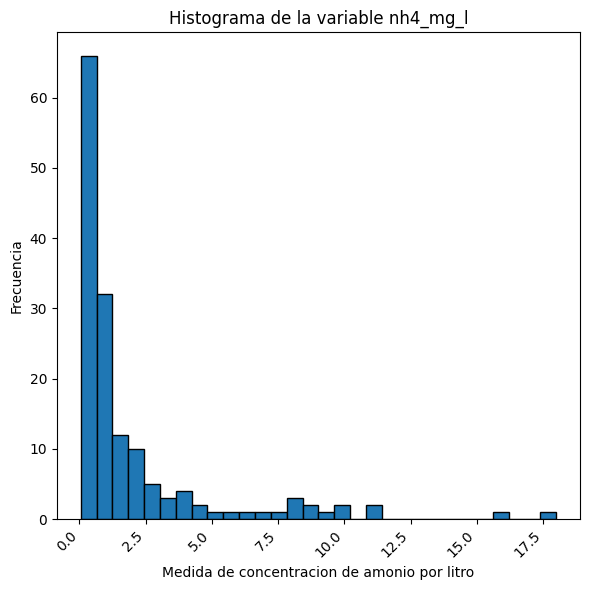

In [27]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 6))
plt.hist(base_sindicotomicas['nh4_mg_l'], bins=30, edgecolor='black')
plt.xlabel('Medida de concentracion de amonio por litro')
plt.ylabel('Frecuencia')
plt.title('Histograma de la variable nh4_mg_l')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Comportamiento sesgado a izquierda

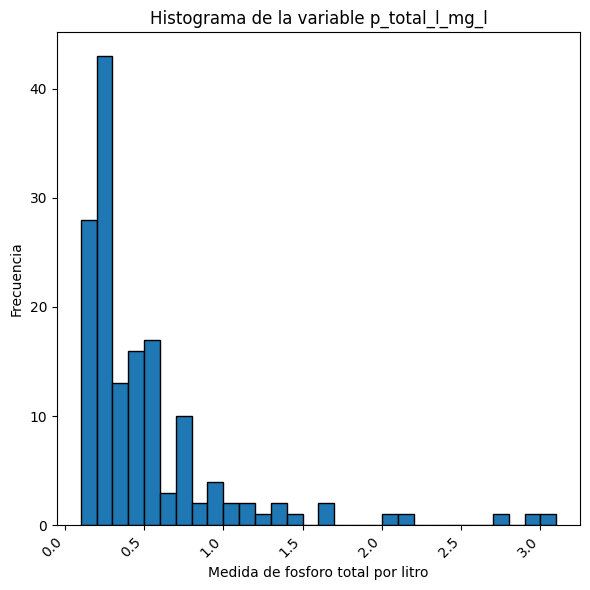

In [28]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 6))
plt.hist(base_sindicotomicas['p_total_l_mg_l'], bins=30, edgecolor='black')
plt.xlabel('Medida de fosforo total por litro')
plt.ylabel('Frecuencia')
plt.title('Histograma de la variable p_total_l_mg_l')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Comportamiento sesgado a izquierda

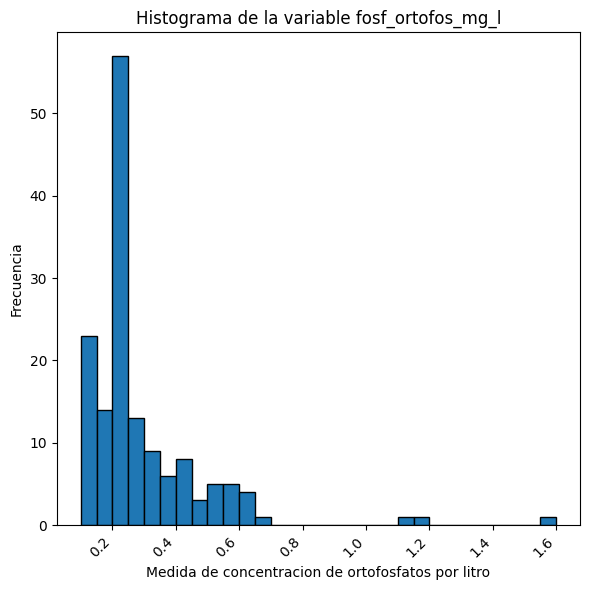

In [29]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 6))
plt.hist(base_sindicotomicas['fosf_ortofos_mg_l'], bins=30, edgecolor='black')
plt.xlabel('Medida de concentracion de ortofosfatos por litro')
plt.ylabel('Frecuencia')
plt.title('Histograma de la variable fosf_ortofos_mg_l')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Comportamiento sesgado a izquierda

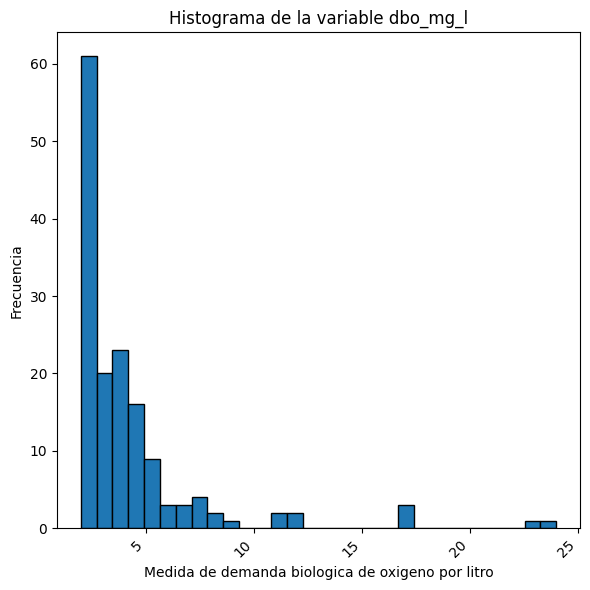

In [30]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 6))
plt.hist(base_sindicotomicas['dbo_mg_l'], bins=30, edgecolor='black')
plt.xlabel('Medida de demanda biologica de oxigeno por litro')
plt.ylabel('Frecuencia')
plt.title('Histograma de la variable dbo_mg_l')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Comportamiento sesgado a izquierda.

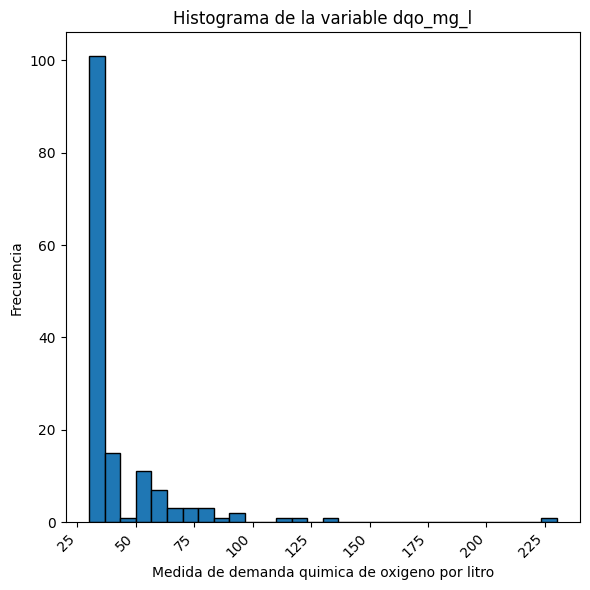

In [31]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 6))
plt.hist(base_sindicotomicas['dqo_mg_l'], bins=30, edgecolor='black')
plt.xlabel('Medida de demanda quimica de oxigeno por litro')
plt.ylabel('Frecuencia')
plt.title('Histograma de la variable dqo_mg_l')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Comportamiento sesgado a izquierda.

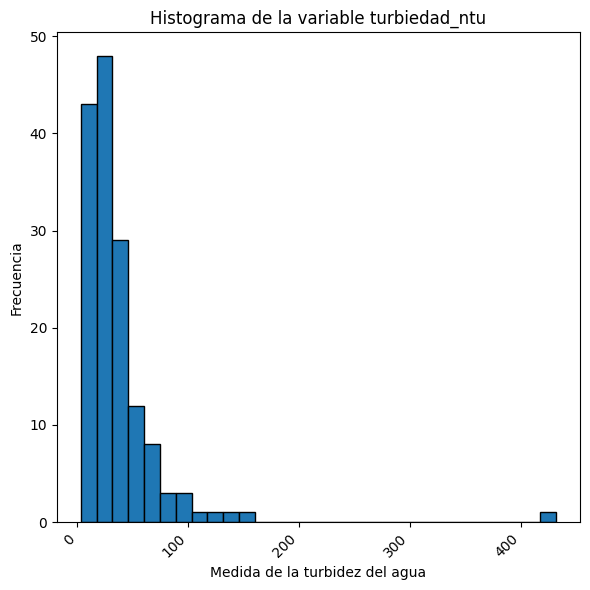

In [32]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 6))
plt.hist(base_sindicotomicas['turbiedad_ntu'], bins=30, edgecolor='black')
plt.xlabel('Medida de la turbidez del agua')
plt.ylabel('Frecuencia')
plt.title('Histograma de la variable turbiedad_ntu')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Comportamiento sesgado a izquierda.

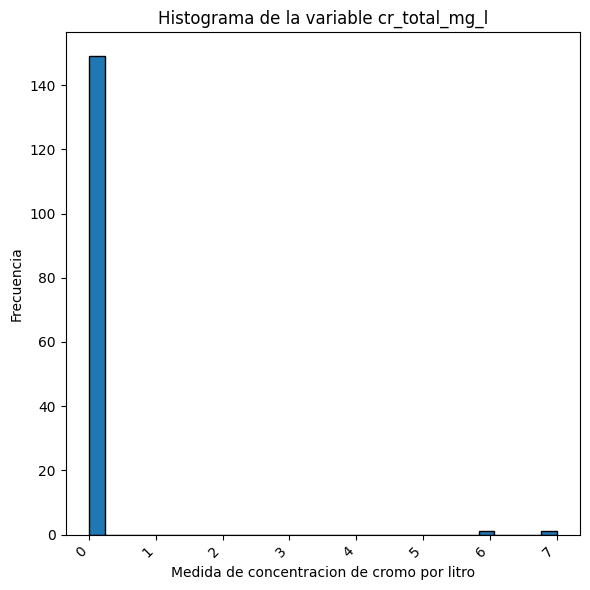

In [33]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 6))
plt.hist(base_sindicotomicas['cr_total_mg_l'], bins=30, edgecolor='black')
plt.xlabel('Medida de concentracion de cromo por litro')
plt.ylabel('Frecuencia')
plt.title('Histograma de la variable cr_total_mg_l')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Presenta un comportamiento con mucha frecuencia sobre valores bajos de concentracion de cromo por litro.

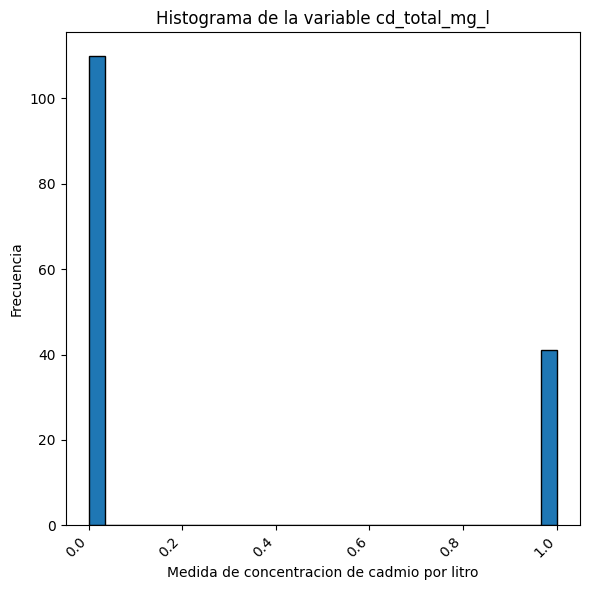

In [34]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 6))
plt.hist(base_sindicotomicas['cd_total_mg_l'], bins=30, edgecolor='black')
plt.xlabel('Medida de concentracion de cadmio por litro')
plt.ylabel('Frecuencia')
plt.title('Histograma de la variable cd_total_mg_l')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Presenta un comportamiento con frecuencia en dos valores sobre la concentracion de cadmio por litro.

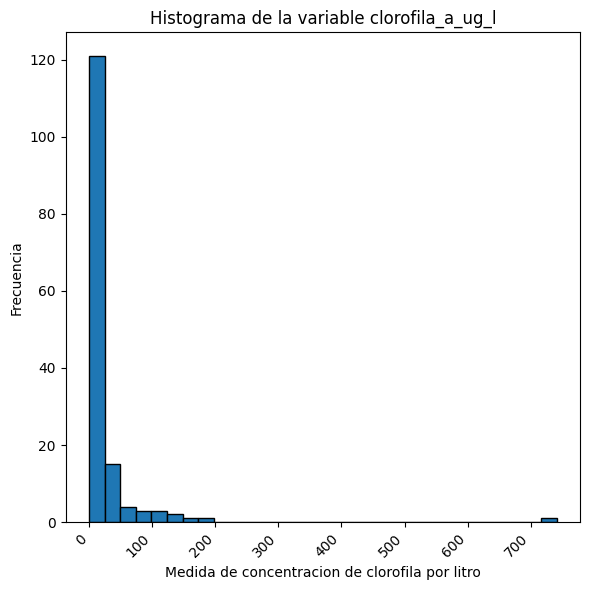

In [35]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 6))
plt.hist(base_sindicotomicas['clorofila_a_ug_l'], bins=30, edgecolor='black')
plt.xlabel('Medida de concentracion de clorofila por litro')
plt.ylabel('Frecuencia')
plt.title('Histograma de la variable clorofila_a_ug_l')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Comportamiento sesgado a izquierda.

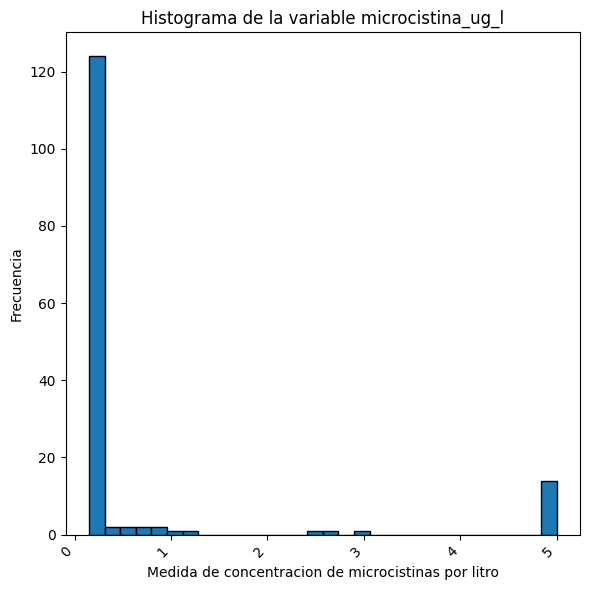

In [36]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 6))
plt.hist(base_sindicotomicas['microcistina_ug_l'], bins=30, edgecolor='black')
plt.xlabel('Medida de concentracion de microcistinas por litro')
plt.ylabel('Frecuencia')
plt.title('Histograma de la variable microcistina_ug_l')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Presenta un comportamiento con mayor frecuencia de valores bajos sobre la concentracion de microcistinas por litro.

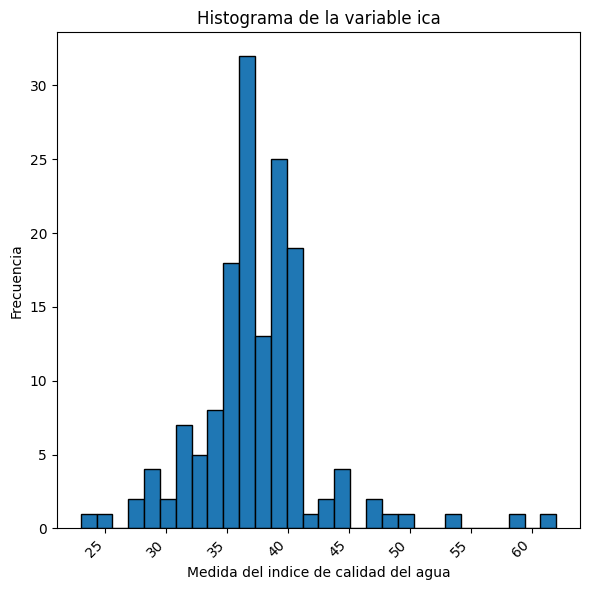

In [37]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 6))
plt.hist(base_sindicotomicas['ica'], bins=30, edgecolor='black')
plt.xlabel('Medida del indice de calidad del agua')
plt.ylabel('Frecuencia')
plt.title('Histograma de la variable ica')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Presenta un comportamiento sesgado a izquierda.

Realizamos la matriz de correlaciones de Pearson de las variables cuantitativas para ver si hay posibles relaciones lineales entre las variables.



In [38]:
correlation_matrix = base_sindicotomicas.corr()
correlation_matrix

,tem_agua,tem_aire,od,ph,colif_fecales_ufc_100ml,escher_coli_ufc_100ml,enteroc_ufc_100ml,nitrato_mg_l,nh4_mg_l,p_total_l_mg_l,fosf_ortofos_mg_l,dbo_mg_l,dqo_mg_l,turbiedad_ntu,cr_total_mg_l,cd_total_mg_l,clorofila_a_ug_l,microcistina_ug_l,ica
tem_agua,1.000000,0.732034,-0.117715,-0.287789,0.003514,0.007900,-0.047095,-0.114126,-0.134801,-0.358972,-0.198168,0.109616,0.054605,0.000389,-0.119067,-0.236982,0.068317,0.190649,0.084620
tem_aire,0.732034,1.000000,-0.150859,-0.340921,-0.065414,-0.109049,-0.146634,-0.289547,-0.163160,-0.258572,-0.193376,0.064273,0.146498,0.043521,-0.163322,-0.320126,0.120503,0.365864,0.089911
od,-0.117715,-0.150859,1.000000,0.449466,-0.146875,-0.079098,-0.198121,0.055190,-0.328621,-0.108866,-0.161430,-0.154197,-0.006964,0.177331,-0.049827,0.136256,0.139991,0.051192,0.266243
ph,-0.287789,-0.340921,0.449466,1.000000,-0.000074,0.031497,-0.021077,0.085540,0.062762,0.088415,0.123837,0.057823,0.169166,0.260473,-0.036153,0.170066,0.281864,0.174514,0.000691
colif_fecales_ufc_100ml,0.003514,-0.065414,-0.146875,-0.000074,1.000000,0.462022,0.681245,-0.020857,0.195158,0.062433,0.086025,0.176810,0.031409,-0.077870,0.047011,-0.185989,-0.070181,-0.003860,-0.296713
escher_coli_ufc_100ml,0.007900,-0.109049,-0.079098,0.031497,0.462022,1.000000,0.596599,-0.005200,0.461271,0.151576,0.380685,0.563068,0.034093,-0.087857,0.041861,0.054298,-0.056227,-0.059387,-0.336324
enteroc_ufc_100ml,-0.047095,-0.146634,-0.198121,-0.021077,0.681245,0.596599,1.000000,0.087180,0.305052,0.054743,0.172956,0.321505,0.000037,-0.113204,0.037684,-0.024094,-0.068704,-0.129291,-0.403863
nitrato_mg_l,-0.114126,-0.289547,0.055190,0.085540,-0.020857,-0.005200,0.087180,1.000000,0.110275,0.105669,0.118616,0.191717,-0.049096,-0.078555,0.119794,0.139946,-0.130121,-0.205273,-0.050724
nh4_mg_l,-0.134801,-0.163160,-0.328621,0.062762,0.195158,0.461271,0.305052,0.110275,1.000000,0.467510,0.711578,0.399465,-0.008767,-0.193338,0.083759,-0.099804,-0.101786,0.051512,-0.275712
p_total_l_mg_l,-0.358972,-0.258572,-0.108866,0.088415,0.062433,0.151576,0.054743,0.105669,0.467510,1.000000,0.595438,0.194311,0.142486,0.012121,0.205808,-0.293713,0.039862,0.061439,-0.099617


La mostramos utilizando un mapa de color para hacer enfasis en aquellas posibles relaciones fuertes. Tomamos un valor de correlación  absoluto mayor a 0,67.

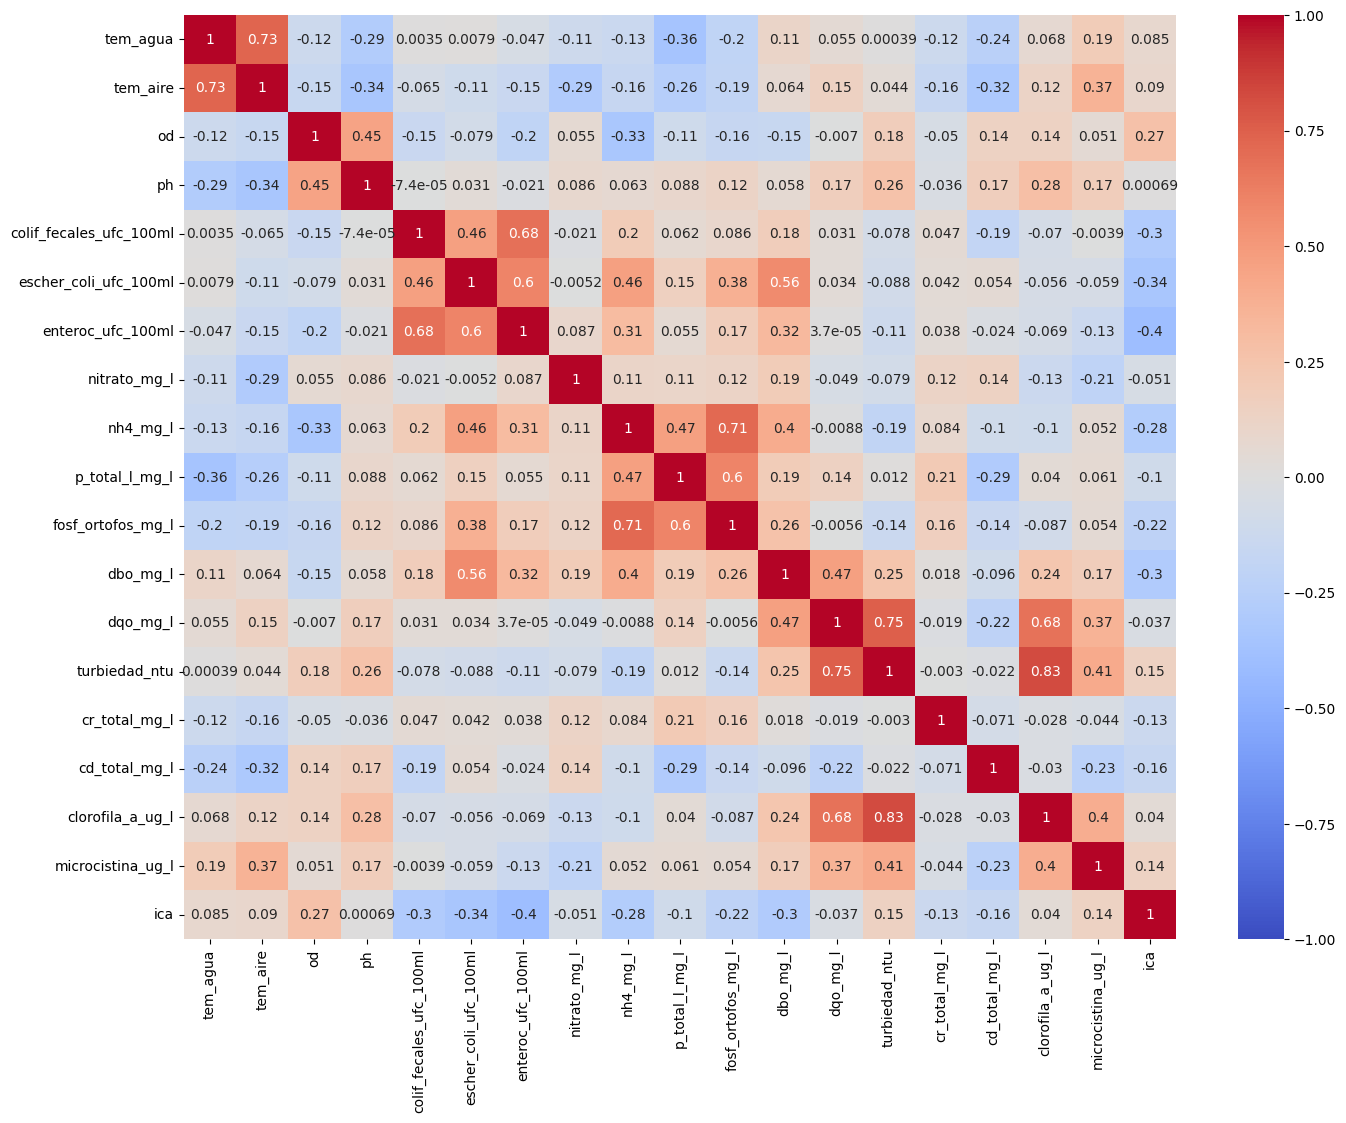

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16,12))
sns.heatmap(correlation_matrix, vmin=-1.0, vmax=1.0, center=0.0, annot=True, cmap= 'coolwarm')
plt.show()

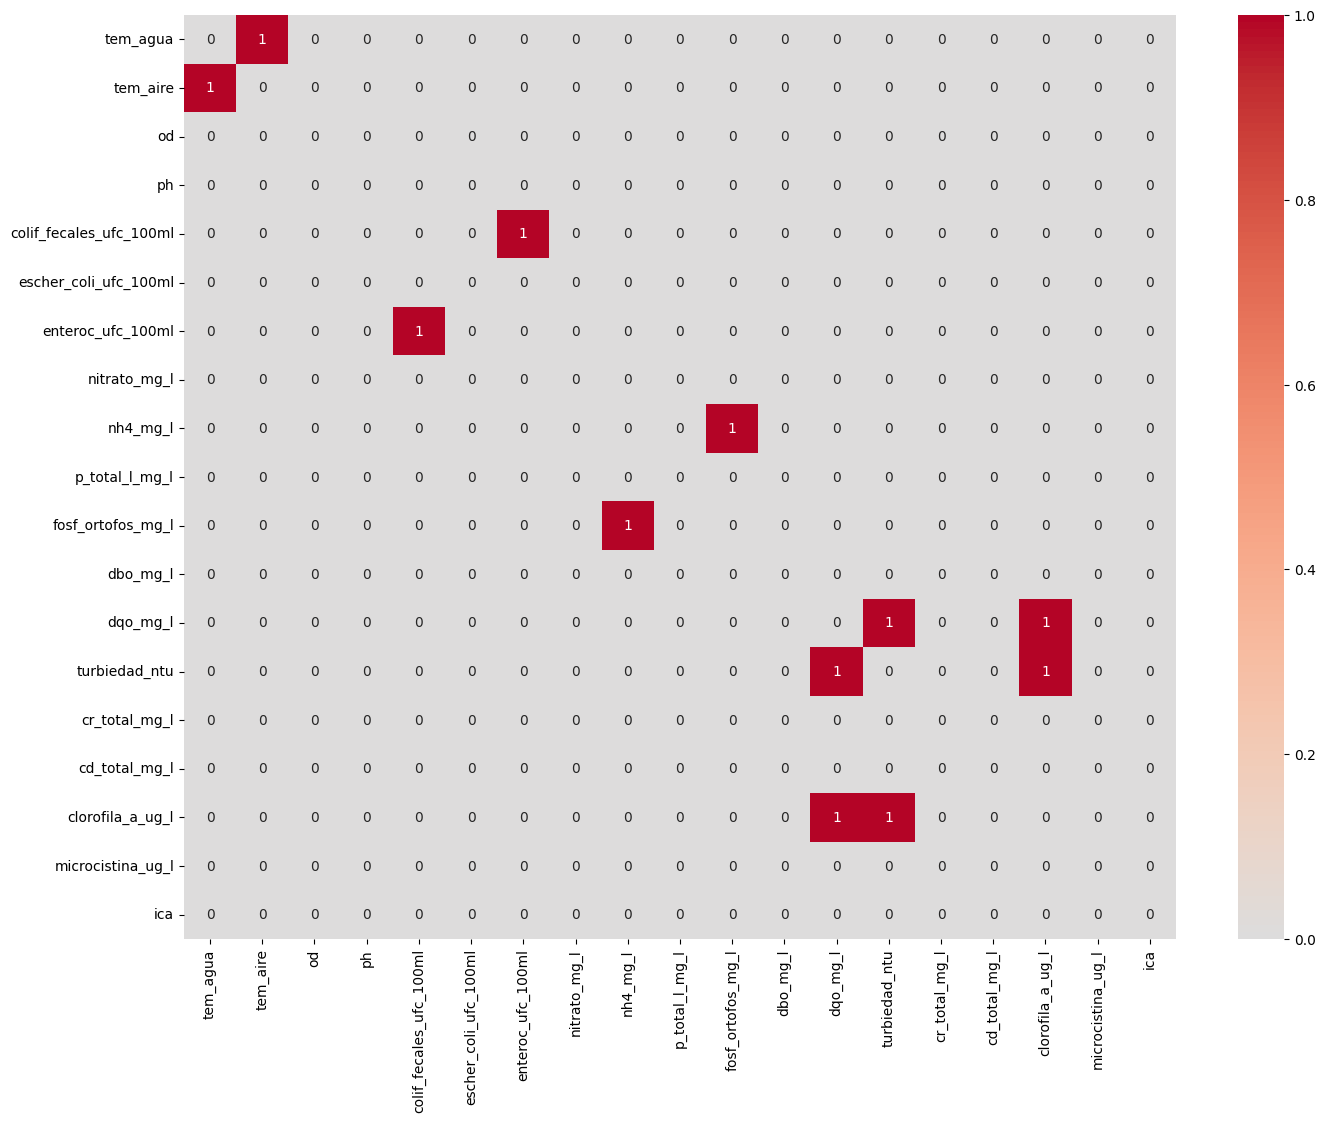

In [40]:
import matplotlib.pyplot as plt
import numpy as np

correlation_matrix_umbralizada = correlation_matrix.abs() > 0.67
# sacamos la diagonal
np.fill_diagonal(correlation_matrix_umbralizada.values, 0)

plt.figure(figsize=(16,12));
sns.heatmap(correlation_matrix_umbralizada, vmin=0.0, vmax=1.0, center=0.0, annot=True, cmap= 'coolwarm')
plt.show()

Realizamos para cada una de las posibles relaciones un scatter plot, para ver si la relacion era lineal (podriamos ver una recta) o no.

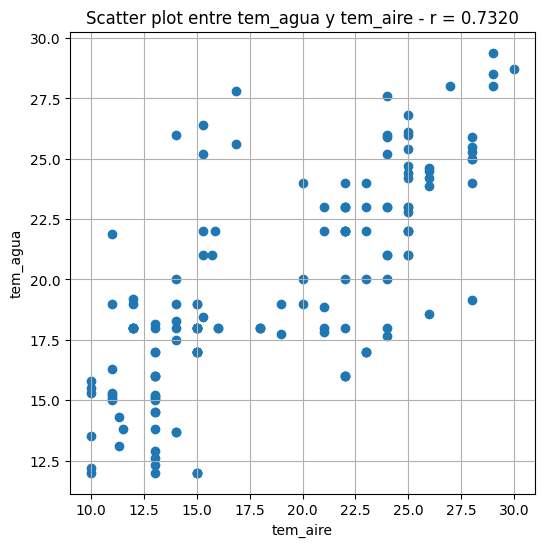

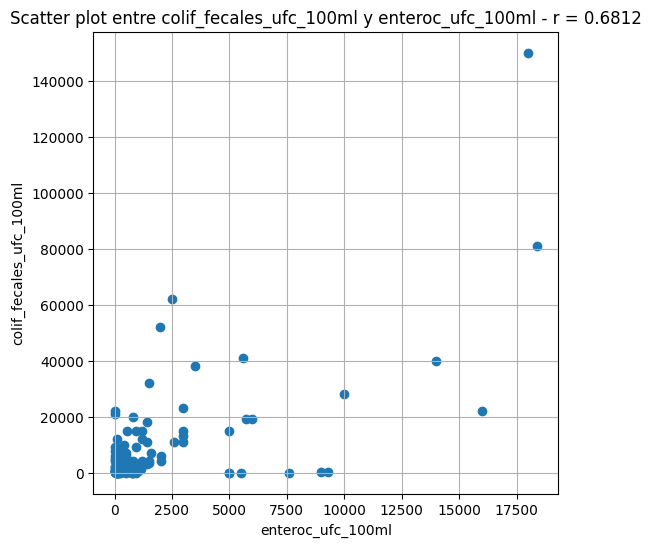

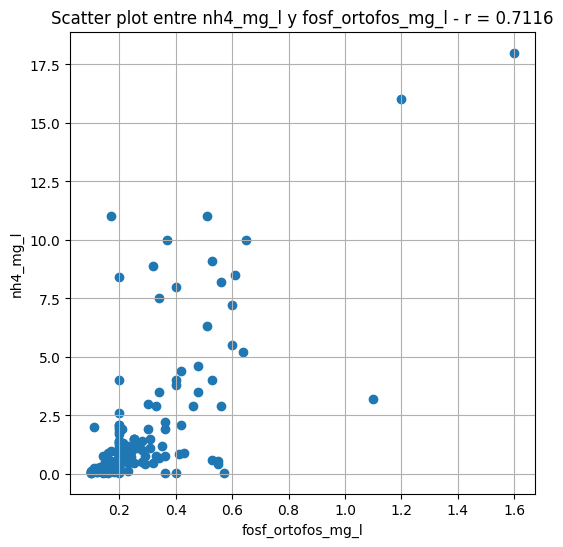

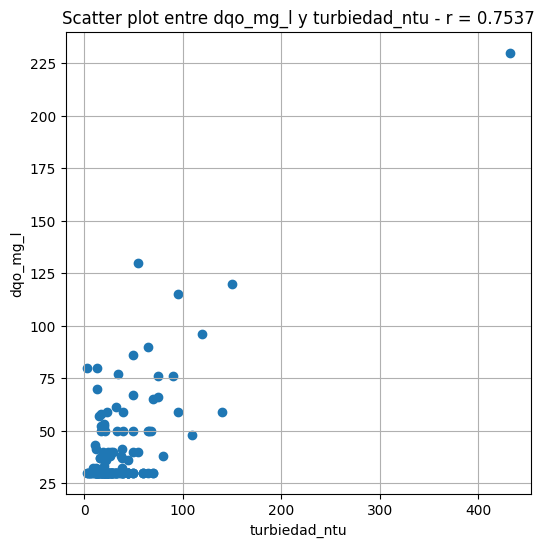

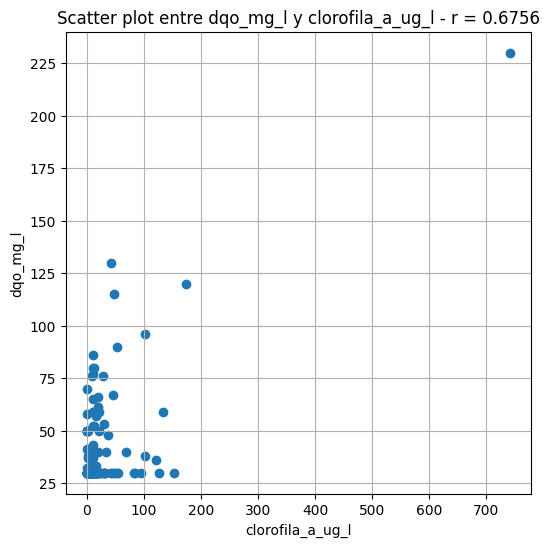

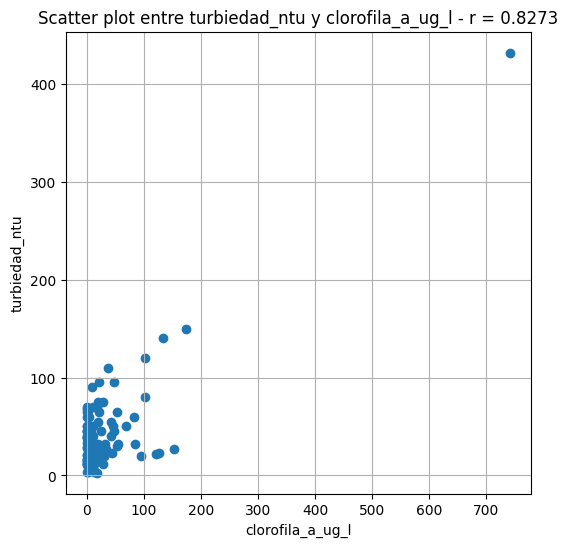

In [41]:
for i, col in enumerate(correlation_matrix_umbralizada.columns):
  for j in range(i,len(correlation_matrix_umbralizada.index)):
    # extraemos el nombre de la fila en la que estamos
    row = correlation_matrix_umbralizada.index[j]
    # si en esa posición tenemos un True en la matriz umbralizada
    if correlation_matrix_umbralizada.loc[row, col]:
      # nos traemos el valor de esa correlación
      correlation = correlation_matrix.loc[row, col]
      plt.figure(figsize=(6, 6))
      plt.scatter(base_sindicotomicas[row], base_sindicotomicas[col])

      plt.title(f"Scatter plot entre {col} y {row} - r = {correlation:.4f}")
      plt.xlabel(row)
      plt.ylabel(col)
      plt.grid(True)
      plt.show()

Al ver que la turbiedad del agua tiene una fuerte correlación con la clorofila y la demanda quimica de oxigeno, surge nuestra primer hipótesis:

**H1: ¿La turbiedad del agua se ve influenciada por la presencia de clorofila en el agua y por la demanda quimica de oxigeno?**

Realizamos primeramente un grafico de reducción de dimensionalidad PCA sobre "clorofila_a_ug_l" y "dqo_mg_l" pintadas por "turbiedad_ntu".

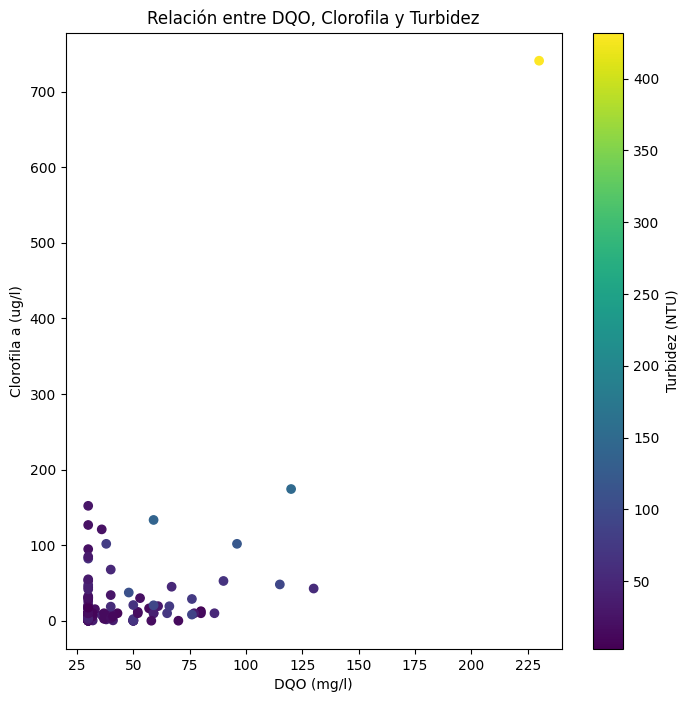

In [42]:
plt.figure(figsize=(8, 8))
scatter = plt.scatter(base_completa['dqo_mg_l'], base_completa['clorofila_a_ug_l'], c=base_completa['turbiedad_ntu'], cmap='viridis')
plt.xlabel('DQO (mg/l)')
plt.ylabel('Clorofila a (ug/l)')
plt.title('Relación entre DQO, Clorofila y Turbidez')
plt.colorbar(scatter, label='Turbidez (NTU)')
plt.show()

Como vemos un cierto comportamiento no lineal, decidimos realizar finalmente un grafico en 3D para complementarlo.

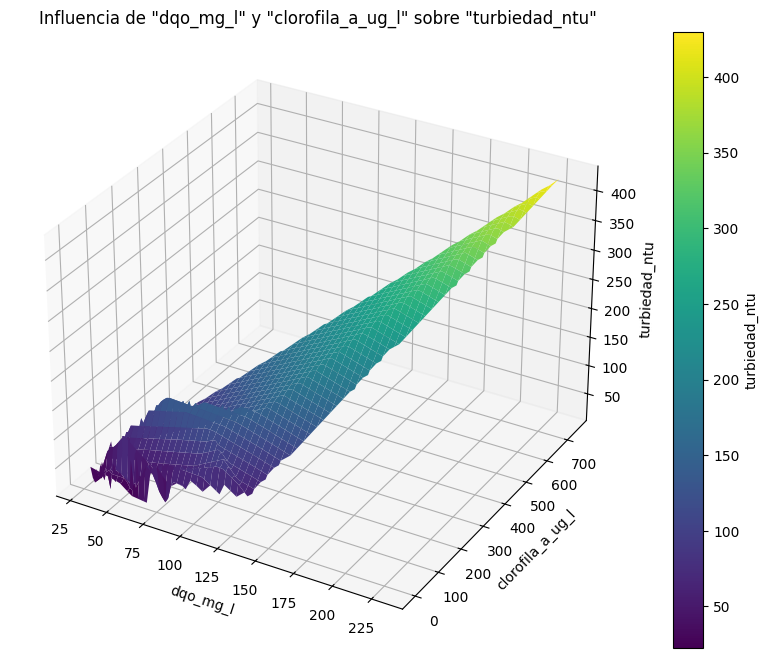

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

X = base_completa['dqo_mg_l']
Y = base_completa['clorofila_a_ug_l']
Z = base_completa['turbiedad_ntu']

#crear malla para la superficie
x_grid, y_grid = np.meshgrid(np.linspace(X.min(), X.max(), 100),
                             np.linspace(Y.min(), Y.max(), 100))

#interpolación para obtener valores de Z (turbiedad) en la malla
from scipy.interpolate import griddata
z_grid = griddata((X, Y), Z, (x_grid, y_grid), method='linear')

#crear el gráfico de superficie
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(x_grid, y_grid, z_grid, cmap='viridis', edgecolor='none')

ax.set_xlabel('dqo_mg_l')
ax.set_ylabel('clorofila_a_ug_l')
ax.set_zlabel('turbiedad_ntu')
ax.set_title('Influencia de "dqo_mg_l" y "clorofila_a_ug_l" sobre "turbiedad_ntu"')
fig.colorbar(surf, label='turbiedad_ntu')

plt.show()


Como la relación es creciente, se ve que a menor proporción de demanda quimica de oxigeno y clorofila disminuye la turbidez del agua.
Por ende **la hipótesis H1 queda validada.**

Nos interesamos en el indice de la calidad del agua y surgió nuestra segunda hipótesis:

**H2: ¿El índice de calidad del agua se ve influenciado por  las características físico químicas y microbiológicas registradas?**

Realizamos primeramente un gráfico de reducción de dimensionalidad PCA con las variables fisico-quimicas (como tem_agua, ph, etc) y las microbiologicas (como escher_coli_ufc_100ml, clorofila_a_ug_l, etc) pintadas sobre ica.



In [44]:
# prompt: imprimir variable 'ica' de base_completa

print(base_completa['ica'])

0      53.000000
1      39.000000
2      48.000000
3      42.000000
4      39.000000
         ...    
164    36.000000
165    39.571429
166    36.000000
167    35.000000
168    38.000000
Name: ica, Length: 151, dtype: float64


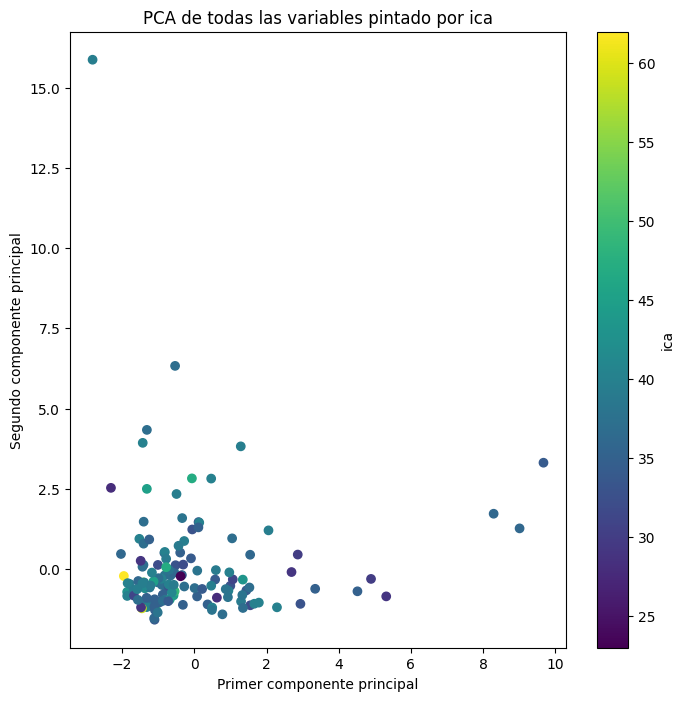

Varianza explicada por cada componente principal: [0.16910328 0.13799991]


In [45]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
calidad = base_completa['ica']
# Seleccionar las variables para el PCA sin la variable 'ica'
variables_pca = base_completa.drop(['ica'], axis=1)

# Estandarizar las variables
x = StandardScaler().fit_transform(variables_pca)

# Crear el objeto PCA
pca = PCA(n_components=2) # Reducir a 2 componentes principales

# Ajustar el modelo PCA a los datos
principalComponents = pca.fit_transform(x)

# Crear un nuevo DataFrame con los componentes principales
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

# Agregar la variable 'ica' al DataFrame
finalDf = pd.concat([principalDf, base_completa['ica']], axis = 1)

# Gráfico de dispersión de los componentes principales pintados por 'ica'
plt.figure(figsize=(8, 8))
plt.scatter(finalDf['principal component 1'], finalDf['principal component 2'], c=finalDf['ica'], cmap='viridis')
plt.xlabel('Primer componente principal')
plt.ylabel('Segundo componente principal')
plt.title('PCA de todas las variables pintado por ica')
plt.colorbar(label='ica')
plt.show()

# Mostrar la varianza explicada por cada componente principal
print('Varianza explicada por cada componente principal:', pca.explained_variance_ratio_)

In [46]:
pca.__dict__

{'n_components': 2,
 'copy': True,
 'whiten': False,
 'svd_solver': 'auto',
 'tol': 0.0,
 'iterated_power': 'auto',
 'n_oversamples': 10,
 'power_iteration_normalizer': 'auto',
 'random_state': None,
 'n_features_in_': 24,
 '_fit_svd_solver': 'full',
 'mean_': array([ 9.41116206e-17, -1.11757549e-16, -1.82341265e-16, -1.12933945e-15,
         3.52918577e-17,  5.29377866e-17,  4.99967985e-17,  2.35279052e-17,
        -1.76459289e-17, -4.41148222e-17,  1.17639526e-17, -2.11751146e-16,
         4.11738340e-17,  4.70558103e-17, -3.52918577e-17,  0.00000000e+00,
        -4.70558103e-17,  5.88197629e-17,  2.76636697e-17, -1.17639526e-17,
         1.47049407e-17, -2.35279052e-17, -2.58806957e-16,  1.23521502e-16]),
 'noise_variance_': 0.7292214005870761,
 'n_samples_': 151,
 'n_components_': 2,
 'components_': array([[-8.83858455e-02, -1.21343728e-01, -1.71630349e-01,
         -1.10725317e-02,  2.81826727e-01,  2.08672684e-01,
          2.31955026e-01,  1.32701443e-01,  2.42017945e-01,
      

Vemos que este PCA solo representa un 35%, por lo que decidimos proceder con una reduccion de la dimensionalidad mediante T-sne

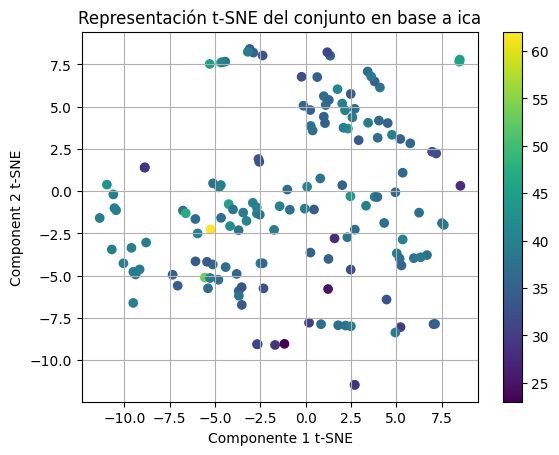

In [47]:
from sklearn.manifold import TSNE
X_tsne = TSNE(n_components=2, random_state=10).fit_transform(x)

plt.scatter(X_tsne[:,0], X_tsne[:,1],c=calidad.values, cmap='viridis')
plt.grid(True)
plt.xlabel('Componente 1 t-SNE')
plt.ylabel('Component 2 t-SNE')
plt.title('Representación t-SNE del conjunto en base a ica')
plt.colorbar()
plt.show()

Como este gráfico no nos permite ver ningun tipo de comportamiento, **la** **hipótesis H2 es refutada**.

Decidimos entonces, reducir el conjunto de características para seguir explorando el indice de la calidad del agua y su comportamiento. Surge entonces nuestra tercer hipótesis:

**H3: ¿Influyen las colonias fecales en el indice de la calidad del agua?**

Realizamos primeramente un gráfico de reducción de dimensionalidad PCA con las tres bacterias fecales "enteroc_ufc_100ml", "colif_fecales_ufc_100ml" y "escher_coli_ufc_100ml" pintadas por "ica"

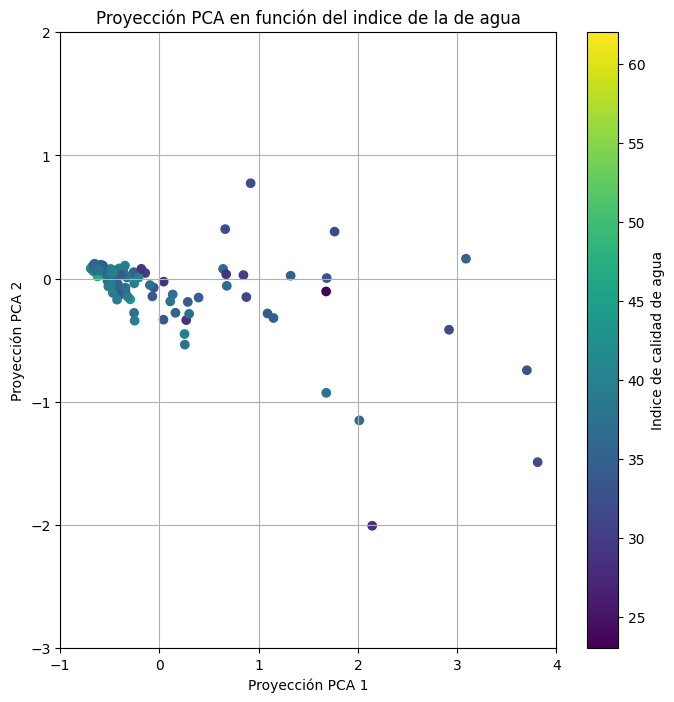

In [48]:
x = base_completa[['colif_fecales_ufc_100ml', 'escher_coli_ufc_100ml', 'enteroc_ufc_100ml']].copy()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)
pca = PCA(n_components=2, whiten=False)
principalComponents = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 8))
plt.scatter(principalComponents[:, 0], principalComponents[:, 1], c=base_completa['ica'], cmap='viridis')
plt.colorbar(label='Indice de calidad de agua')
plt.xlabel('Proyección PCA 1')
plt.ylabel('Proyección PCA 2')
plt.title('Proyección PCA en función del indice de la de agua')
plt.grid(True)

plt.xlim([-1, 4])
plt.ylim([-3, 2])

plt.show()

Vemos que el gráfico nos muestra un leve comportamiento entre las variables fecales y la variable ICA, aumentando de izquierda a derecha.


Nos permite dar un paso más para validar la hipótesis.


La variable continua 'ica', al observar su histograma, no presenta una distribución normal evidente. Por lo tanto, se optó por crear una nueva variable cualitativa llamada 'ica_cualitativa' a partir de la varibale 'ica', que clasifica los datos en tres categorías: 'Calidad alta', 'Calidad media' y 'Calidad baja'.

In [49]:
def categorize_ica(df):
  """Categorizes ICA values into 'Baja', 'Media', and 'Alta' quality."""
  conditions = [
      df['ica'] < 35,
      (df['ica'] >= 35) & (df['ica'] <= 45),
      df['ica'] > 45
  ]
  choices = ['Baja', 'Media', 'Alta']
  df['ica_cualitativa'] = np.select(conditions, choices, default='Sin clasificación')
  return df

# Apply categorization directly to base_completa
base_completa = categorize_ica(base_completa)

# Count the number of samples in each category
sample_counts = base_completa['ica_cualitativa'].value_counts()
sample_counts


,count
ica_cualitativa,
Media,114
Baja,30
Alta,7


Realizamos un histograma por cada variable bacteriana con el fin de visualizar si la media de estas variaba dependiendo de la calidad del agua

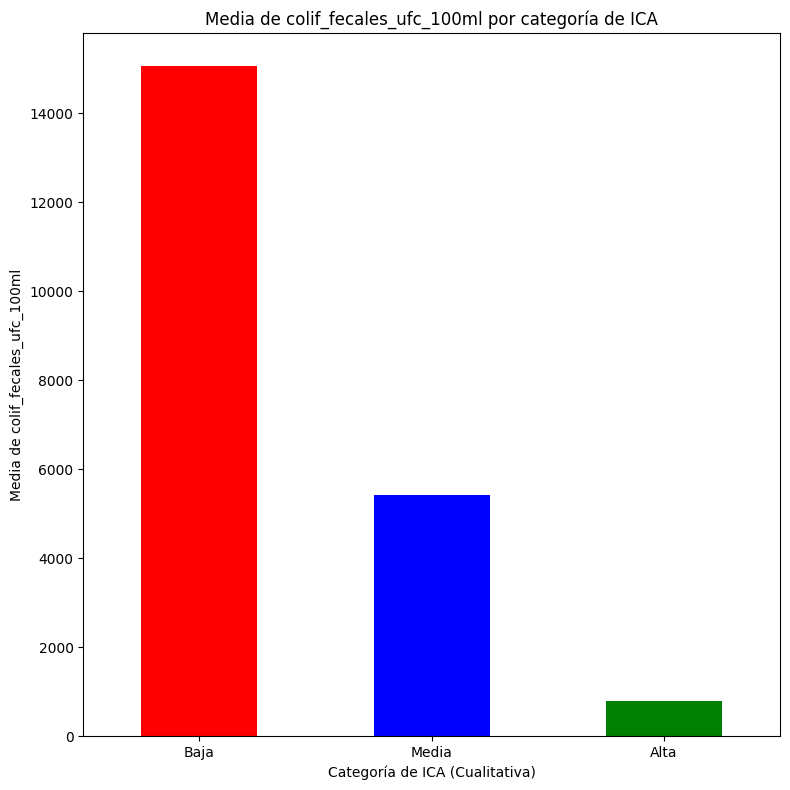

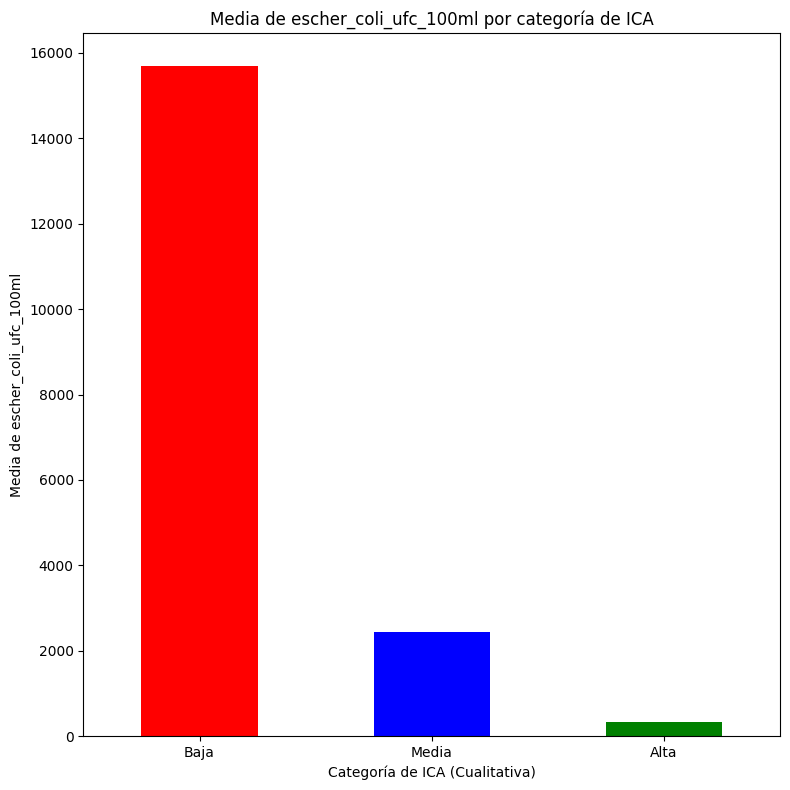

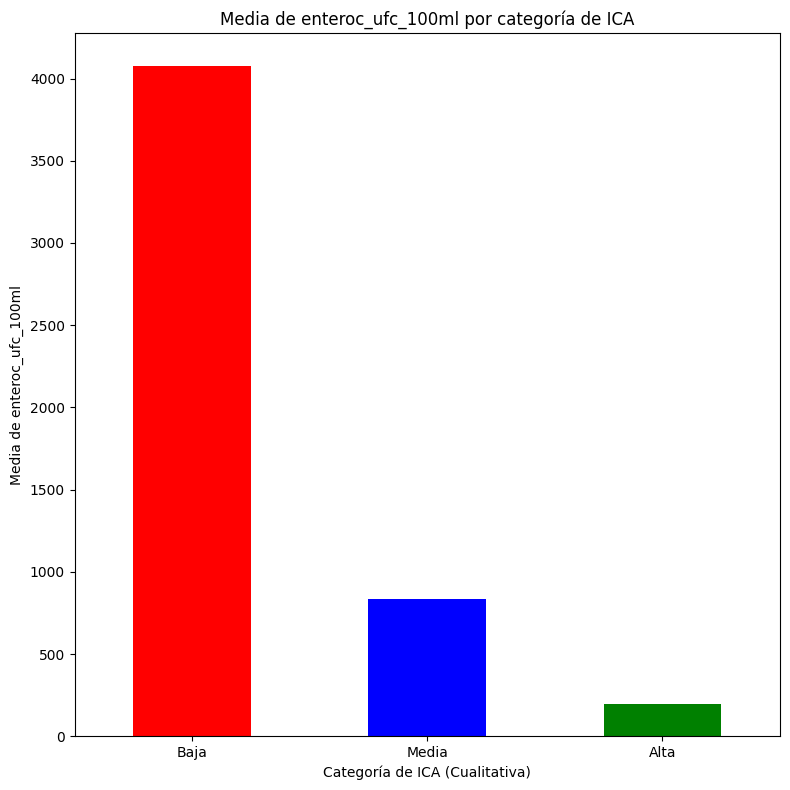

In [50]:
variables_bacterianas = ['colif_fecales_ufc_100ml', 'escher_coli_ufc_100ml', 'enteroc_ufc_100ml']
colores = {'Media': 'blue', 'Alta': 'green', 'Baja': 'red'}
for variable in variables_bacterianas:
    plt.figure(figsize=(8, 8))

    # Agrupar los datos por 'ica_cualitativa' y calcular la media de la variable bacteriana
    data_agrupada = base_completa.groupby('ica_cualitativa')[variable].mean()

    # Reordenar los datos en el orden deseado
    orden_categorias = ['Baja', 'Media', 'Alta']
    data_agrupada = data_agrupada.reindex(orden_categorias)

    # Crear el gráfico de barras
    data_agrupada.plot(kind='bar', color=[colores[categoria] for categoria in orden_categorias])

    # Configurar el título y las etiquetas
    plt.title(f'Media de {variable} por categoría de ICA')
    plt.xlabel('Categoría de ICA (Cualitativa)')
    plt.ylabel(f'Media de {variable}')
    plt.xticks(rotation=0)

    # Mostrar el gráfico
    plt.tight_layout()
    plt.show()

Se observa una diferencia notable en el promedio de la cantidad de bacterias fecales según el tipo de calidad del agua. Esto nos lleva a buscar un test de hipótesis adecuado para nuestras variables con el fin de confirmar o refutar nuestra suposición. Para ello, evaluamos si nuestras variables continuas siguen una distribución normal mediante el test de Shapiro-Wilk, un histograma y un QQ-PLOT.

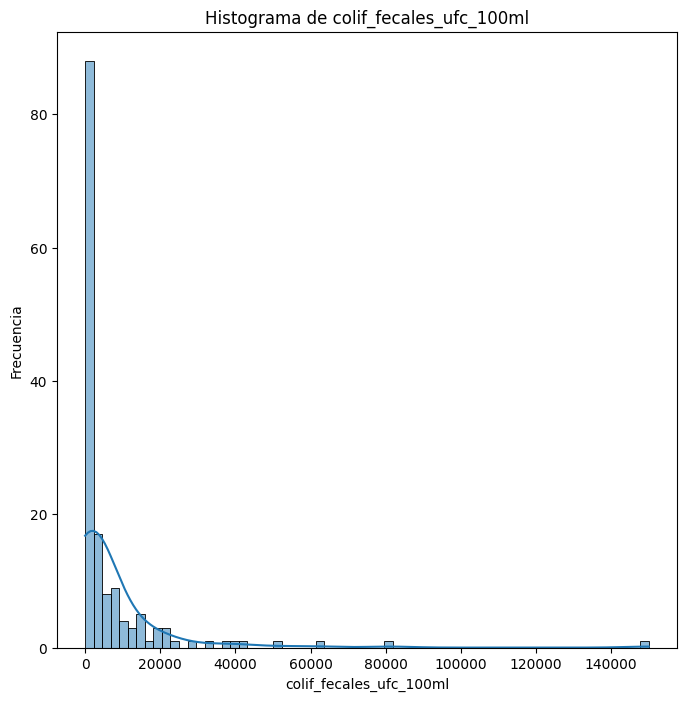

<Figure size 800x800 with 0 Axes>

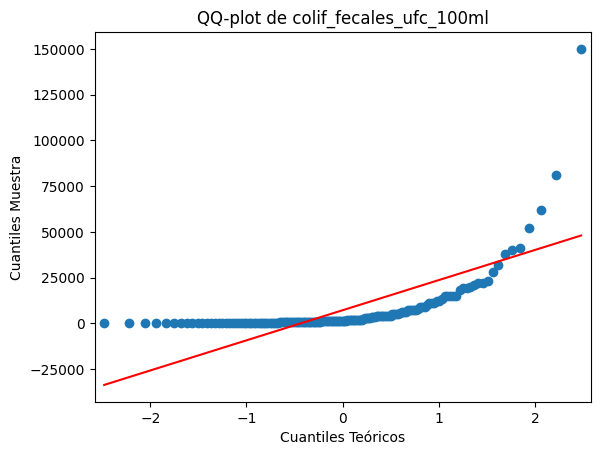

Test de Shapiro-Wilk para colif_fecales_ufc_100ml:
Estadístico: 0.4366489522067609
Valor p: 1.0611799906275576e-21
Se rechaza la hipótesis nula: la muestra no proviene de una distribución normal.



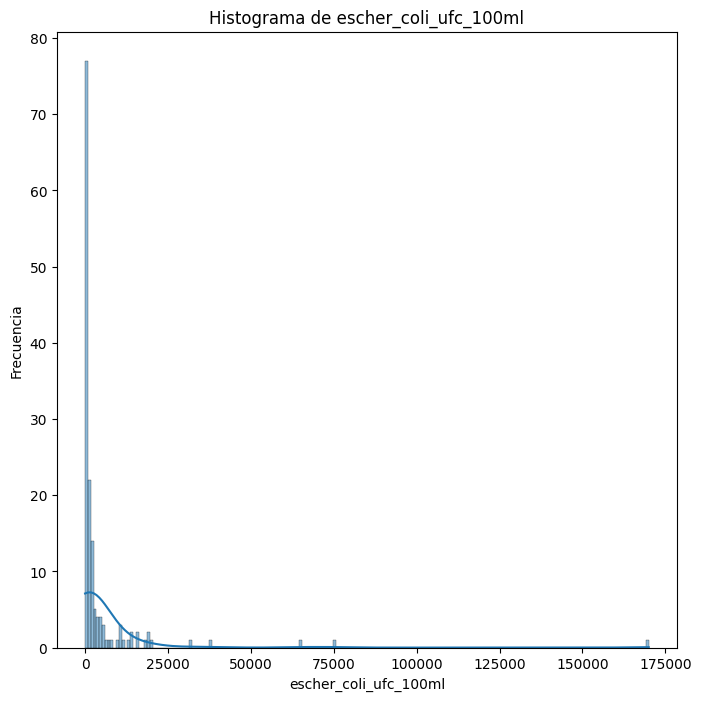

<Figure size 800x800 with 0 Axes>

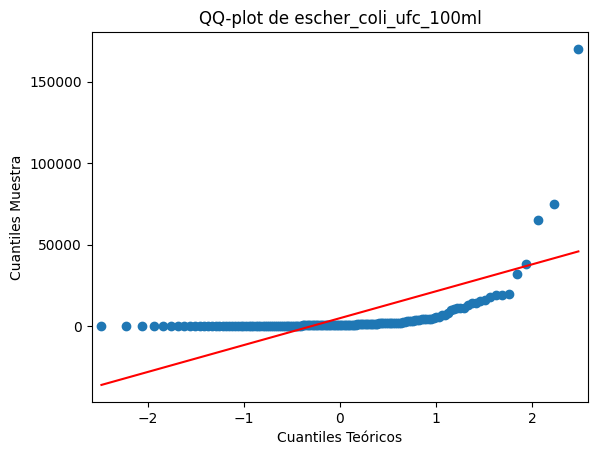

Test de Shapiro-Wilk para escher_coli_ufc_100ml:
Estadístico: 0.28414824360822966
Valor p: 4.974088413567656e-24
Se rechaza la hipótesis nula: la muestra no proviene de una distribución normal.



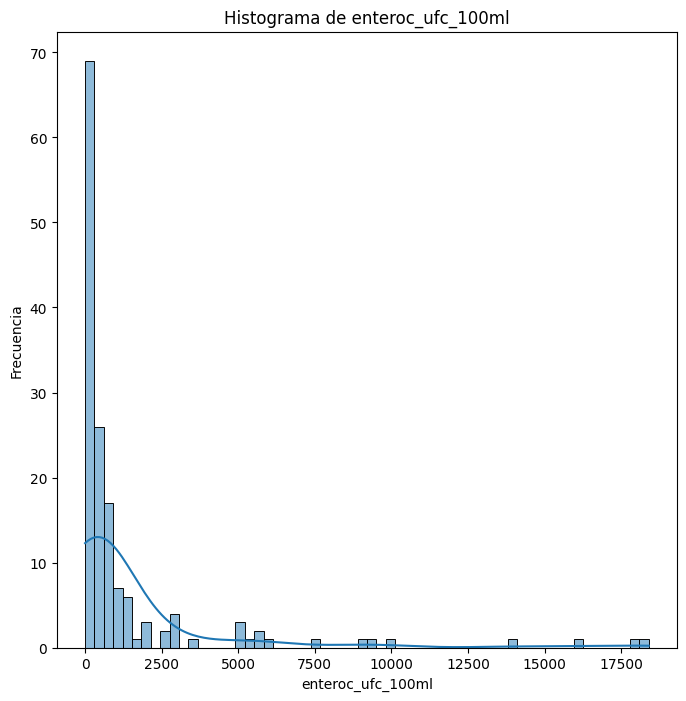

<Figure size 800x800 with 0 Axes>

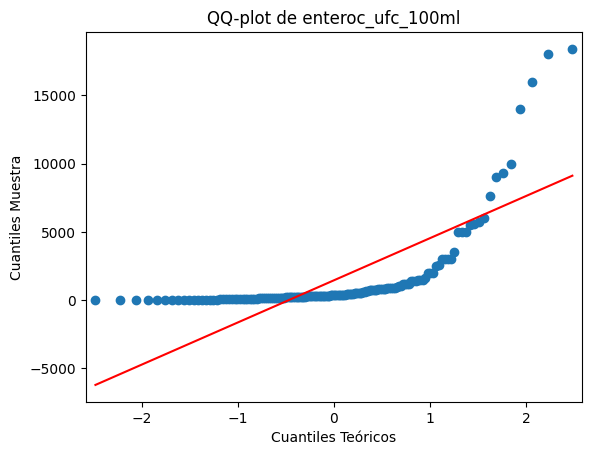

Test de Shapiro-Wilk para enteroc_ufc_100ml:
Estadístico: 0.4776898869369106
Valor p: 5.4301244801175754e-21
Se rechaza la hipótesis nula: la muestra no proviene de una distribución normal.



In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, levene
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import f_oneway


for var in variables_bacterianas:
    data = base_completa[var]

    #Histograma
    plt.figure(figsize=(8, 8))
    sns.histplot(data, kde=True)
    plt.title(f'Histograma de {var}')
    plt.xlabel(var)
    plt.ylabel('Frecuencia')
    plt.show()

    # QQ-plot
    plt.figure(figsize=(8, 8))
    qqplot(data, line='s')
    plt.title(f'QQ-plot de {var}')
    plt.xlabel('Cuantiles Teóricos')
    plt.ylabel('Cuantiles Muestra')
    plt.show()

    # Test de Shapiro-Wilk
    stat, p = shapiro(data)
    print(f"Test de Shapiro-Wilk para {var}:")
    print(f"Estadístico: {stat}")
    print(f"Valor p: {p}")

    if p > 0.05:
        print("No se rechaza la hipótesis nula: la muestra puede provenir de una distribución normal.\n")
    else:
        print("Se rechaza la hipótesis nula: la muestra no proviene de una distribución normal.\n")

Concluimos que ninguna de nuestras variables continuas bacterianas sigue una distribución normal. Por lo tanto, procedimos a realizar un test de Levene para evaluar la homogeneidad de las varianzas de las variables continuas en relación con la variable cualitativa, que cuenta con tres categorías. Por esta razón, utilizamos el test de Levene.

In [52]:
from scipy.stats import levene

for variable in variables_bacterianas:
  # Obtener los datos de cada grupo (ICA cualitativa)
  grupo_bajo = base_completa[base_completa['ica_cualitativa'] == 'Baja'][variable]
  grupo_medio = base_completa[base_completa['ica_cualitativa'] == 'Media'][variable]
  grupo_alto = base_completa[base_completa['ica_cualitativa'] == 'Alta'][variable]

  # Realizar el test de Levene
  stat, p = levene(grupo_bajo, grupo_medio, grupo_alto)

  print(f"Test de Levene para {variable} vs. ica_cualitativa:")
  print(f"Estadístico: {stat}")
  print(f"Valor p: {p}")

  if p > 0.05:
    print(f"Las varianzas de {variable} son iguales entre los grupos de ica_cualitativa. Hay homocedasiticidad")
  else:
    print(f"Las varianzas de {variable} no son iguales entre los grupos de ica_cualitativa. No hay homocedasticidad")
  print("---")

Test de Levene para colif_fecales_ufc_100ml vs. ica_cualitativa:
Estadístico: 3.274914293269947
Valor p: 0.04057849056477391
Las varianzas de colif_fecales_ufc_100ml no son iguales entre los grupos de ica_cualitativa. No hay homocedasticidad
---
Test de Levene para escher_coli_ufc_100ml vs. ica_cualitativa:
Estadístico: 6.669321231200688
Valor p: 0.0016854872025123657
Las varianzas de escher_coli_ufc_100ml no son iguales entre los grupos de ica_cualitativa. No hay homocedasticidad
---
Test de Levene para enteroc_ufc_100ml vs. ica_cualitativa:
Estadístico: 12.36525766214331
Valor p: 1.0815730458534121e-05
Las varianzas de enteroc_ufc_100ml no son iguales entre los grupos de ica_cualitativa. No hay homocedasticidad
---


Al corroborar que nuestras variables continuas no presentan una distribucion normal ni homocedasticidad. Utilizaremos el test no parametrico de Kruskal-Wallis para confirmar o refutar nuestra hipotesis.

In [53]:
from scipy.stats import kruskal

# Filtrar el DataFrame para obtener solo las filas con las categorías deseadas
df_filtered = base_completa[base_completa['ica_cualitativa'].isin(['Alta', 'Media', 'Baja'])]

for variable in variables_bacterianas:
  groups = [df_filtered[variable][df_filtered['ica_cualitativa'] == 'Alta'],
            df_filtered[variable][df_filtered['ica_cualitativa'] == 'Media'],
            df_filtered[variable][df_filtered['ica_cualitativa'] == 'Baja']]

  stat, p = kruskal(*groups)
  print(f"Test de Kruskal-Wallis para {variable} frente a ica_cualitativa:")
  print(f"Estadístico: {stat}")
  print(f"Valor p: {p}")

  if p < 0.05:
      print(f"Se rechaza la hipótesis nula. Existe una diferencia significativa entre las medianas de {variable} para los diferentes niveles de ica_cualitativa.")
  else:
      print(f"No se rechaza la hipótesis nula. No existe una diferencia significativa entre las medianas de {variable} para los diferentes niveles de ica_cualitativa.")

  print("---")

Test de Kruskal-Wallis para colif_fecales_ufc_100ml frente a ica_cualitativa:
Estadístico: 14.433698371586878
Valor p: 0.0007341118286883122
Se rechaza la hipótesis nula. Existe una diferencia significativa entre las medianas de colif_fecales_ufc_100ml para los diferentes niveles de ica_cualitativa.
---
Test de Kruskal-Wallis para escher_coli_ufc_100ml frente a ica_cualitativa:
Estadístico: 38.39648115019237
Valor p: 4.5952596526015385e-09
Se rechaza la hipótesis nula. Existe una diferencia significativa entre las medianas de escher_coli_ufc_100ml para los diferentes niveles de ica_cualitativa.
---
Test de Kruskal-Wallis para enteroc_ufc_100ml frente a ica_cualitativa:
Estadístico: 27.664792008613084
Valor p: 9.83256313790979e-07
Se rechaza la hipótesis nula. Existe una diferencia significativa entre las medianas de enteroc_ufc_100ml para los diferentes niveles de ica_cualitativa.
---


Podemos concluir que la hipótesis planteada es válida, ya que las colonias fecales ejercen una influencia significativa en la calidad del agua. El análisis de las bacterias presentes en el agua, como Escherichia coli, Enterococcus y las coliformes fecales, ha mostrado una correlación clara con la variación en los niveles del índice de calidad del agua (ICA).

A raíz de este análisis, surge una nueva interrogante que debe ser abordada para comprender más a fondo los factores que afectan la calidad del agua. Para ello, decidimos expandir el análisis e incorporar las variables de NH₄ y fosfato, con el fin de evaluar si estas también ejercen influencia en los niveles del índice de calidad del agua. Al sumar estos nuevos componentes, buscamos obtener una visión más completa y precisa de los factores que contribuyen a la variabilidad en la calidad del agua del río.

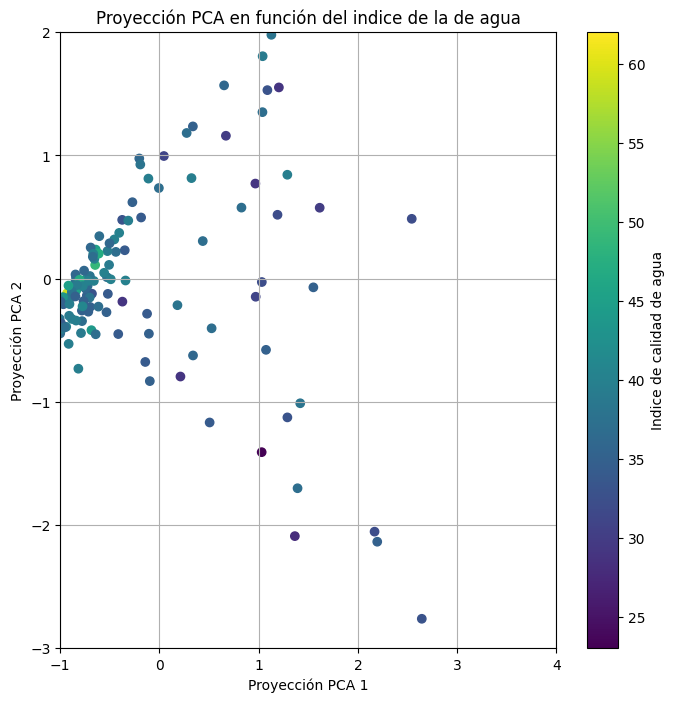

In [54]:
x = base_completa[['colif_fecales_ufc_100ml', 'escher_coli_ufc_100ml', 'enteroc_ufc_100ml','nh4_mg_l','fosf_ortofos_mg_l']].copy()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)
pca = PCA(n_components=2, whiten=False)
principalComponents = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 8))
plt.scatter(principalComponents[:, 0], principalComponents[:, 1], c=base_completa['ica'], cmap='viridis')
plt.colorbar(label='Indice de calidad de agua')
plt.xlabel('Proyección PCA 1')
plt.ylabel('Proyección PCA 2')
plt.title('Proyección PCA en función del indice de la de agua')
plt.grid(True)

plt.xlim([-1, 4])
plt.ylim([-3, 2])

plt.show()

Podemos observar un mejor comportamiento en la proyección al incluir las nuevas variables en el análisis. Ahora, con el objetivo de profundizar en la relación entre estas variables y la calidad del agua, realizaremos los histogramas para las nuevas variables.  Estos histogramas nos permitirán visualizar la distribución de cada variable en función de las distintas categorías del índice de calidad del agua (ICA) y examinar si existen diferencias significativas en las medias de estas variables según la categoría de calidad del agua. Este análisis ayudará a entender si estas variables están asociadas de manera significativa con la calidad del agua en el río.

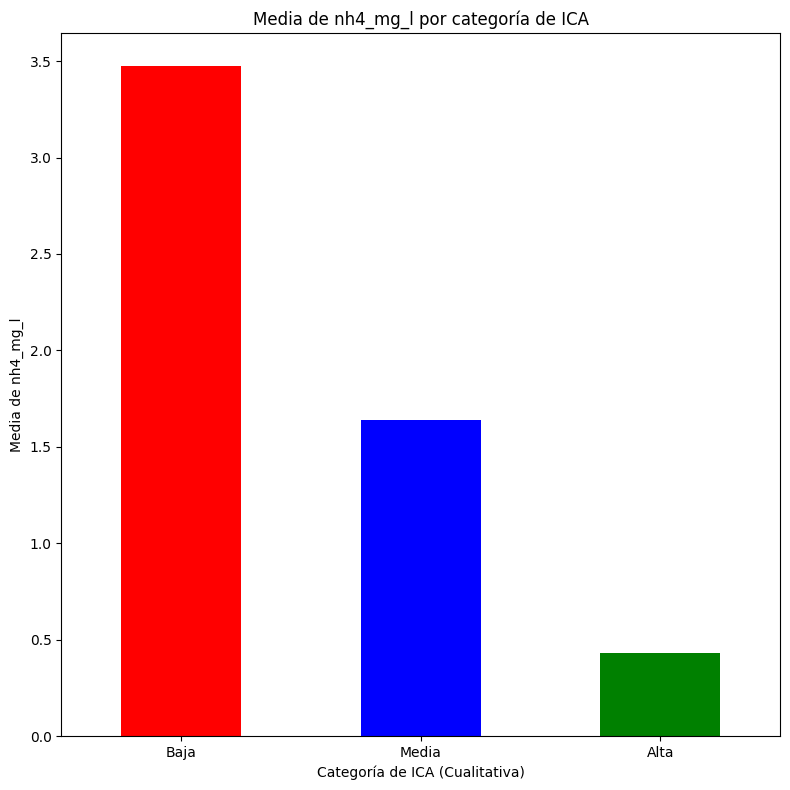

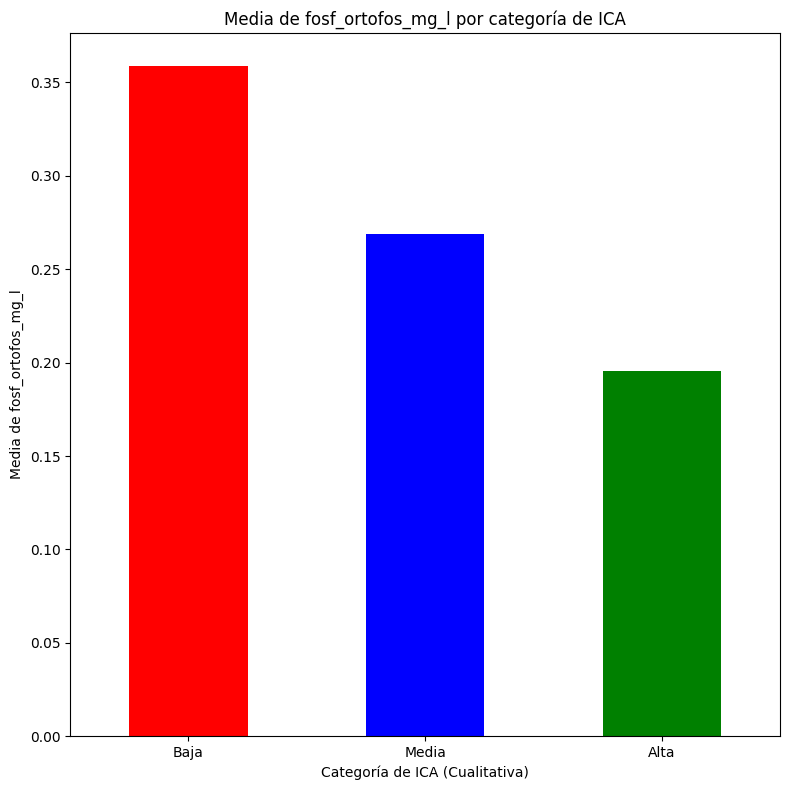

In [55]:
colores = {'Media': 'blue', 'Alta': 'green', 'Baja': 'red'}
variables = ['nh4_mg_l','fosf_ortofos_mg_l']
for variable in variables:
    plt.figure(figsize=(8, 8))

    # Agrupar los datos por 'ica_cualitativa' y calcular la media de la variable bacteriana
    data_agrupada = base_completa.groupby('ica_cualitativa')[variable].mean()

    # Reordenar los datos en el orden deseado
    orden_categorias = ['Baja', 'Media', 'Alta']
    data_agrupada = data_agrupada.reindex(orden_categorias)

    # Crear el gráfico de barras
    data_agrupada.plot(kind='bar', color=[colores[categoria] for categoria in orden_categorias])

    # Configurar el título y las etiquetas
    plt.title(f'Media de {variable} por categoría de ICA')
    plt.xlabel('Categoría de ICA (Cualitativa)')
    plt.ylabel(f'Media de {variable}')
    plt.xticks(rotation=0)

    # Mostrar el gráfico
    plt.tight_layout()
    plt.show()

Analisis de normalidad de las nuevas variables

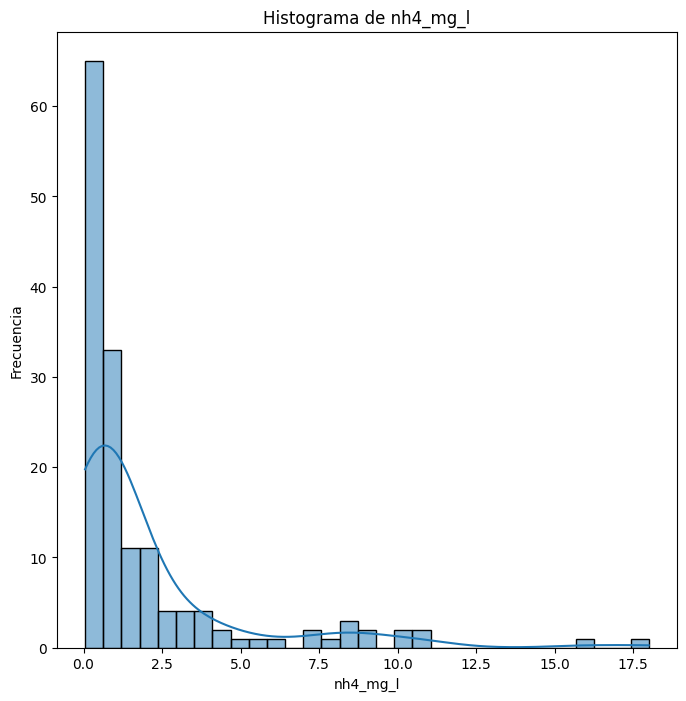

<Figure size 800x800 with 0 Axes>

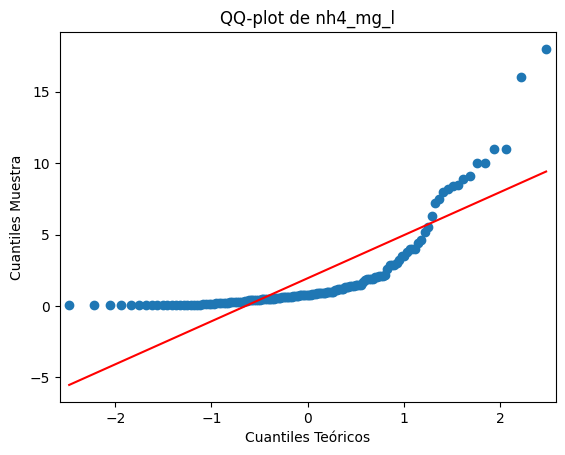

Test de Shapiro-Wilk para nh4_mg_l:
Estadístico: 0.6232710052648103
Valor p: 4.490159509379102e-18
Se rechaza la hipótesis nula: la muestra no proviene de una distribución normal.



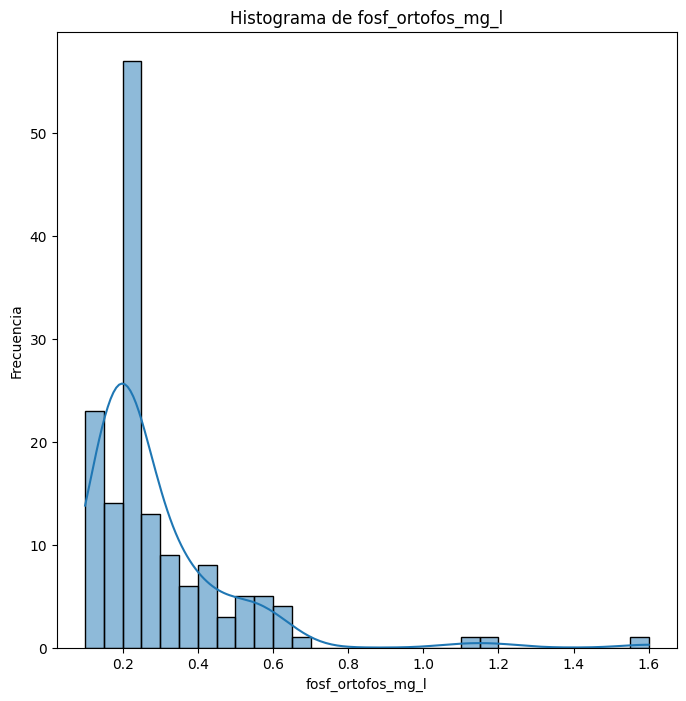

<Figure size 800x800 with 0 Axes>

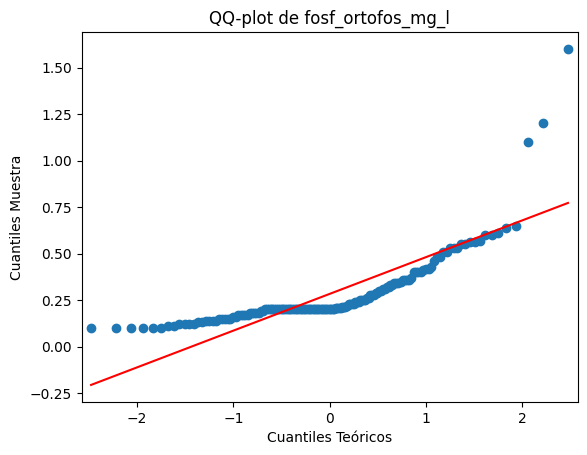

Test de Shapiro-Wilk para fosf_ortofos_mg_l:
Estadístico: 0.6749244893575357
Valor p: 7.796131829086375e-17
Se rechaza la hipótesis nula: la muestra no proviene de una distribución normal.



In [56]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, levene
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import f_oneway


for var in variables:
    data = base_completa[var]

    #Histograma
    plt.figure(figsize=(8, 8))
    sns.histplot(data, kde=True)
    plt.title(f'Histograma de {var}')
    plt.xlabel(var)
    plt.ylabel('Frecuencia')
    plt.show()

    # QQ-plot
    plt.figure(figsize=(8, 8))
    qqplot(data, line='s')
    plt.title(f'QQ-plot de {var}')
    plt.xlabel('Cuantiles Teóricos')
    plt.ylabel('Cuantiles Muestra')
    plt.show()

    # Test de Shapiro-Wilk
    stat, p = shapiro(data)
    print(f"Test de Shapiro-Wilk para {var}:")
    print(f"Estadístico: {stat}")
    print(f"Valor p: {p}")

    if p > 0.05:
        print("No se rechaza la hipótesis nula: la muestra puede provenir de una distribución normal.\n")
    else:
        print("Se rechaza la hipótesis nula: la muestra no proviene de una distribución normal.\n")

Podemos observar que no provienen de una distribucion normal. ¿Pero poseen homocedasticidad?

In [57]:
from scipy.stats import levene

for variable in variables:
  # Obtener los datos de cada grupo (ICA cualitativa)
  grupo_bajo = base_completa[base_completa['ica_cualitativa'] == 'Baja'][variable]
  grupo_medio = base_completa[base_completa['ica_cualitativa'] == 'Media'][variable]
  grupo_alto = base_completa[base_completa['ica_cualitativa'] == 'Alta'][variable]

  # Realizar el test de Levene
  stat, p = levene(grupo_bajo, grupo_medio, grupo_alto)

  print(f"Test de Levene para {variable} vs. ica_cualitativa:")
  print(f"Estadístico: {stat}")
  print(f"Valor p: {p}")

  if p > 0.05:
    print(f"Las varianzas de {variable} son iguales entre los grupos de ica_cualitativa. Hay homocedasiticidad")
  else:
    print(f"Las varianzas de {variable} no son iguales entre los grupos de ica_cualitativa. No hay homocedasticidad")
  print("---")

Test de Levene para nh4_mg_l vs. ica_cualitativa:
Estadístico: 2.814775217382232
Valor p: 0.06312984495531372
Las varianzas de nh4_mg_l son iguales entre los grupos de ica_cualitativa. Hay homocedasiticidad
---
Test de Levene para fosf_ortofos_mg_l vs. ica_cualitativa:
Estadístico: 1.5501789621011308
Valor p: 0.21563559453083367
Las varianzas de fosf_ortofos_mg_l son iguales entre los grupos de ica_cualitativa. Hay homocedasiticidad
---


Podemos observar que, al analizar las variables, hay homocedasticidad para el fosfato , lo que indica que las varianzas son iguales entre los grupos de calidad del agua. Sin embargo, no hay homocedasticidad para el NH₄, lo que sugiere que las varianzas no son iguales entre los grupos.

Dado que no se cumplen los supuestos de homocedasticidad para el amonio, pero para el fosfato sí, y considerando que ambas variables no siguen una distribución normal, podemos proceder con el test no paramétrico de Kruskal-Wallis para evaluar si existen diferencias significativas en las medias de las nuevas variables (fosfato y amonio) entre las categorías del índice de calidad del agua (ICA).

In [58]:
from scipy.stats import kruskal

# Filtrar el DataFrame para obtener solo las filas con las categorías deseadas
df_filtered = base_completa[base_completa['ica_cualitativa'].isin(['Alta', 'Media', 'Baja'])]

for variable in variables:
  groups = [df_filtered[variable][df_filtered['ica_cualitativa'] == 'Alta'],
            df_filtered[variable][df_filtered['ica_cualitativa'] == 'Media'],
            df_filtered[variable][df_filtered['ica_cualitativa'] == 'Baja']]

  stat, p = kruskal(*groups)
  print(f"Test de Kruskal-Wallis para {variable} frente a ica_cualitativa:")
  print(f"Estadístico: {stat}")
  print(f"Valor p: {p}")

  if p < 0.05:
      print(f"Se rechaza la hipótesis nula. Existe una diferencia significativa entre las medianas de {variable} para los diferentes niveles de ica_cualitativa.")
  else:
      print(f"No se rechaza la hipótesis nula. No existe una diferencia significativa entre las medianas de {variable} para los diferentes niveles de ica_cualitativa.")

  print("---")

Test de Kruskal-Wallis para nh4_mg_l frente a ica_cualitativa:
Estadístico: 23.675051958422912
Valor p: 7.228160506915161e-06
Se rechaza la hipótesis nula. Existe una diferencia significativa entre las medianas de nh4_mg_l para los diferentes niveles de ica_cualitativa.
---
Test de Kruskal-Wallis para fosf_ortofos_mg_l frente a ica_cualitativa:
Estadístico: 10.776233868884566
Valor p: 0.004570571923910623
Se rechaza la hipótesis nula. Existe una diferencia significativa entre las medianas de fosf_ortofos_mg_l para los diferentes niveles de ica_cualitativa.
---


Los resultados obtenidos del test de Kruskal-Wallis revelan que existen diferencias significativas en las concentraciones de coliformes fecales, Escherichia coli, Enterococcus, fosfato  y amonio NH₄ entre las distintas categorías del índice de calidad del agua (ICA). Esto refuerza la idea de que tanto las bacterias fecales como los compuestos químicos en el agua influyen en la calidad del agua del río de manera significativa. Al comparar estos hallazgos con los resultados previos para las variables bacterianas, podemos concluir que las cinco variables estudiadas varían en función de la categoría del ICA, lo que sugiere que estos factores, tanto microbiológicos como químicos, están estrechamente relacionados con las variaciones en la calidad del agua.

**H4: La presencia de materia fecal suspendida en el agua, ¿Se ve influenciada por las bacterias fecales?**

Comenzamos realizando un gráfico de reducción de dimensionalidad PCA de las bacterias fecales pintadas por mat_susp.

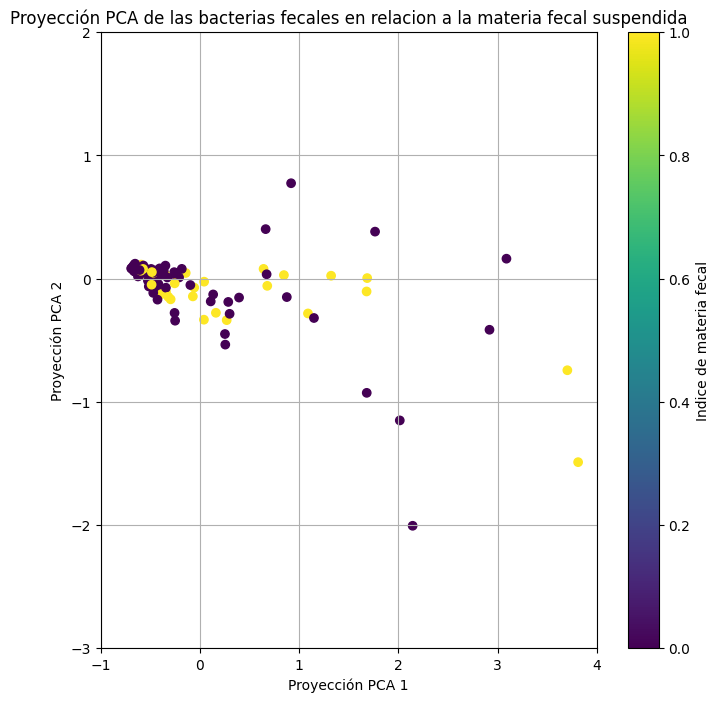

In [59]:
new_df = base_completa[['colif_fecales_ufc_100ml', 'escher_coli_ufc_100ml', 'enteroc_ufc_100ml']].copy()

X = new_df
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA(n_components=2, whiten=False)
principalComponents = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 8))
plt.scatter(principalComponents[:, 0], principalComponents[:, 1], c=base_completa['mat_susp'], cmap='viridis')
plt.colorbar(label='Indice de materia fecal')
plt.xlabel('Proyección PCA 1')
plt.ylabel('Proyección PCA 2')
plt.title('Proyección PCA de las bacterias fecales en relacion a la materia fecal suspendida')
plt.grid(True)

plt.xlim([-1, 4])
plt.ylim([-3, 2])

plt.show()

Podemos observar un patrón o comportamiento interesante en la proyección PCA, lo que sugiere que existe una relación entre las bacterias fecales y la materia fecal suspendida en el agua. Dado este patrón, continuamos con el análisis de nuestra hipótesis.

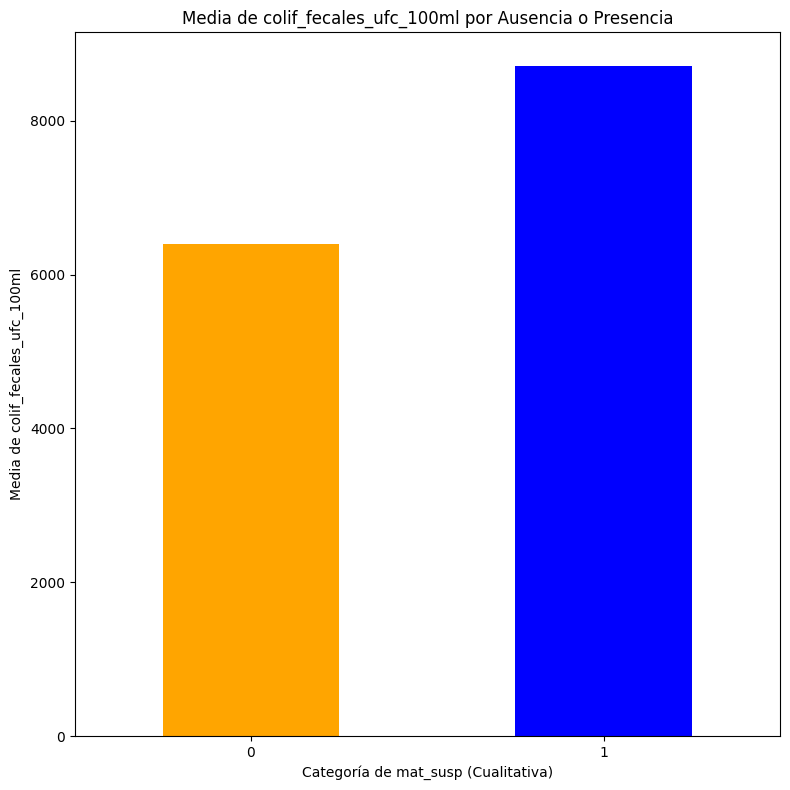

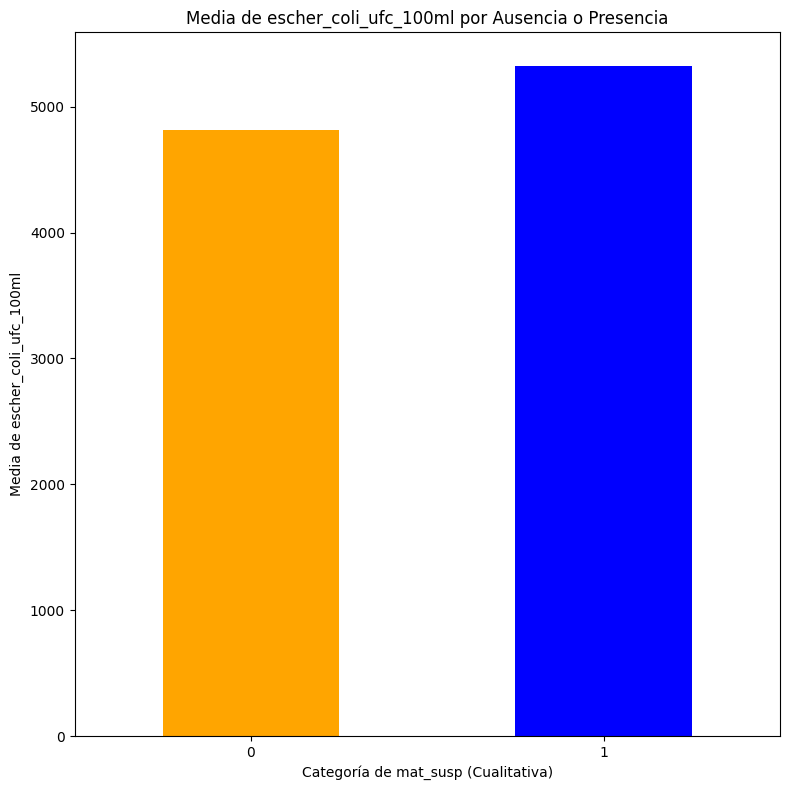

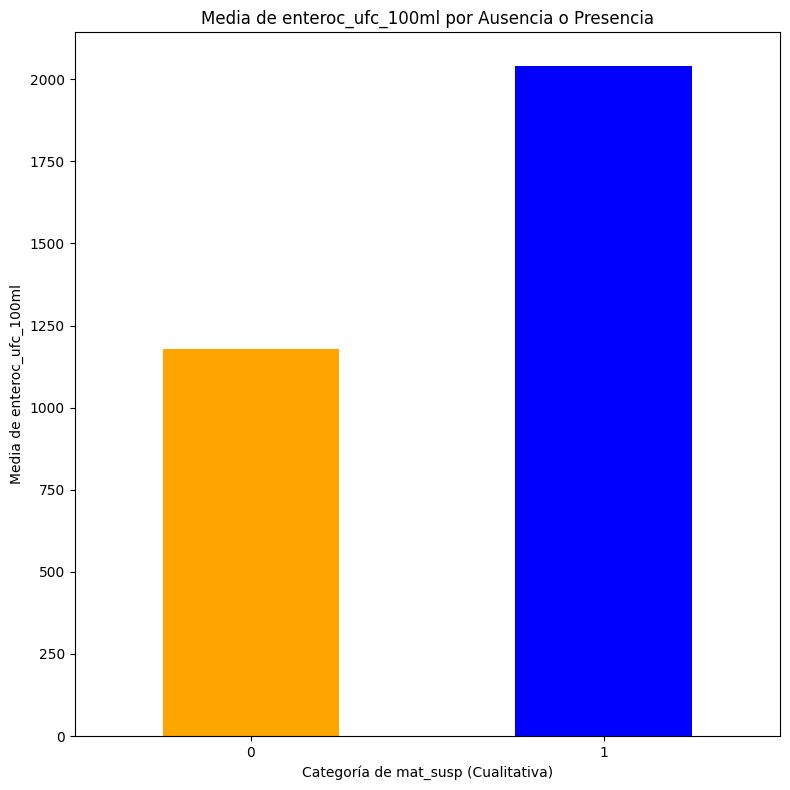

In [60]:
# Definir los colores para las categorías 0 y 1
colores = {0: 'orange', 1: 'blue'}  # 0: Ausencia, 1: Presencia
# Para cada variable bacteriana
for variable in variables_bacterianas:
    plt.figure(figsize=(8, 8))

    # Agrupar los datos por 'mat_susp' y calcular la media de la variable bacteriana
    data_agrupada = base_completa.groupby('mat_susp')[variable].mean()

    # Crear el gráfico de barras directamente, sin necesidad de reindexar
    data_agrupada.plot(kind='bar', color=[colores[categoria] for categoria in data_agrupada.index])

    # Configurar el título y las etiquetas
    plt.title(f'Media de {variable} por Ausencia o Presencia')
    plt.xlabel('Categoría de mat_susp (Cualitativa)')
    plt.ylabel(f'Media de {variable}')
    plt.xticks(rotation=0)

    # Mostrar el gráfico
    plt.tight_layout()
    plt.show()

Parece que existe una diferencia en las medias de las variables bacterianas según la presencia o ausencia de materia fecal suspendida. Para avanzar en el análisis de nuestra hipótesis, realizaremos una evaluación de la normalidad y homocedasticidad de las variables cuantitativas. Este análisis nos permitirá seleccionar el test de hipótesis más adecuado, con el fin de confirmar o refutar la relación entre las bacterias fecales y la materia fecal suspendida en el agua.



Como ya probamos anteriormente que las variables bacterianas no poseen una distribucion normal. Continuamos con el analisis de homocedasticidad mediante Fisher, ya que mat_susp tiene sólo dos grupos.

In [61]:
print("\n")
print('Hipótesis nula (H₀): Las varianzas de los dos grupos son iguales. (Fisher)')
print("\n")

for var in variables_bacterianas:
    grupo_1 = base_completa[base_completa['mat_susp'] == 0][var]
    grupo_2 = base_completa[base_completa['mat_susp'] == 1][var]

    # Test F de Fisher
    stat_f, p_f = f_oneway(grupo_1, grupo_2)

    print(f"Test F de Fisher para {var}:")
    print(f"Estadístico F: {stat_f}")
    print(f"Valor p: {p_f}")

    # Interpretación del valor p
    if p_f > 0.05:
        print("No se rechaza la hipótesis nula: las varianzas son iguales (homocedasticidad).")
    else:
        print("Se rechaza la hipótesis nula: las varianzas son diferentes (heterocedasticidad).")
    print("\n")




Hipótesis nula (H₀): Las varianzas de los dos grupos son iguales. (Fisher)


Test F de Fisher para colif_fecales_ufc_100ml:
Estadístico F: 0.6331674132274572
Valor p: 0.4274617061309878
No se rechaza la hipótesis nula: las varianzas son iguales (homocedasticidad).


Test F de Fisher para escher_coli_ufc_100ml:
Estadístico F: 0.03058051382481316
Valor p: 0.8614169445367705
No se rechaza la hipótesis nula: las varianzas son iguales (homocedasticidad).


Test F de Fisher para enteroc_ufc_100ml:
Estadístico F: 2.5211360809735845
Valor p: 0.11444943750962151
No se rechaza la hipótesis nula: las varianzas son iguales (homocedasticidad).




En este contexto, el hecho de que las tres variables continuas presenten homoscedasticidad tiene sentido, ya que nuestro objetivo es demostrar que la presencia de materia suspendida en el agua no depende únicamente de una sola variable bacteriana, sino de la interacción de las tres.

Por lo tanto, procedemos con el test no paramétrico de Mann-Whitney, dado que estamos trabajando con dos grupos y no cumplimos con los supuestos necesarios para utilizar un test paramétrico.

In [62]:
from scipy.stats import mannwhitneyu

# Test de Mann-Whitney para cada variable bacteriana en relación a los dos grupos de mat_susp
for var in variables_bacterianas:
    grupo_1 = base_completa[base_completa['mat_susp'] == 0][var]
    grupo_2 = base_completa[base_completa['mat_susp'] == 1][var]
    statistic, p_value = mannwhitneyu(grupo_1, grupo_2)

    print(f"Test de Mann-Whitney para la variable {var}:")
    print(f"Estadístico: {statistic}")
    print(f"Valor p: {p_value}")

    if p_value < 0.05:
        print("Se rechaza la hipótesis nula: Existe una diferencia significativa entre los grupos.")
    else:
        print("No se rechaza la hipótesis nula: No hay evidencia de diferencia significativa entre los grupos.")
    print("---")


Test de Mann-Whitney para la variable colif_fecales_ufc_100ml:
Estadístico: 1636.0
Valor p: 0.0011690563157309053
Se rechaza la hipótesis nula: Existe una diferencia significativa entre los grupos.
---
Test de Mann-Whitney para la variable escher_coli_ufc_100ml:
Estadístico: 1742.5
Valor p: 0.004830359307971719
Se rechaza la hipótesis nula: Existe una diferencia significativa entre los grupos.
---
Test de Mann-Whitney para la variable enteroc_ufc_100ml:
Estadístico: 1969.5
Valor p: 0.05674348037806058
No se rechaza la hipótesis nula: No hay evidencia de diferencia significativa entre los grupos.
---


A partir de los resultados obtenidos con el test, podemos confirmar que la presencia de materia fecal suspendida en el agua está influenciada por la presencia de bacterias fecales. Sin embargo, esta influencia se observa únicamente en los coliformes fecales y Escherichia coli, pero no en Enterococcus.

Por lo tanto, la hipótesis H4 queda validada.

Dado que la materia fecal está influenciada por dos bacterias fecales, hemos decidido centrarnos en una de ellas, en este caso los coliformes fecales, para formular nuestra siguiente hipótesis:

**H5: ¿Las colonias de coliformes fecales presentan un comportamiento estacional?**

Para abordar esta pregunta, comenzamos con la elaboración de un gráfico de barras que muestra la media de coliformes fecales en cada una de las estaciones del año. De esta manera, podremos observar si existe alguna variación estacional en las concentraciones de estas bacterias.

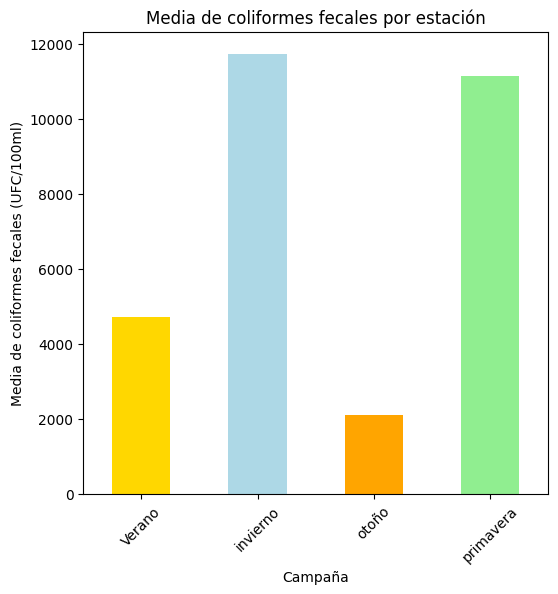

In [63]:
import matplotlib.pyplot as plt
base_completa['campaña'] = campaña #agrego la columna campaña al dataset

#agrupa por 'campaña' y calcula la media de 'colif_fecales_ufc_100ml'
mean_coliformes = base_completa.groupby('campaña')['colif_fecales_ufc_100ml'].mean()

#colores para cada estación
colores_estaciones = {
    'Verano': 'gold',
    'otoño': 'orange',
    'invierno': 'lightblue',
    'primavera': 'lightgreen'
}

#gráfico de barras
plt.figure(figsize=(6, 6))
mean_coliformes.plot(kind='bar', color=[colores_estaciones[est] for est in mean_coliformes.index])

plt.xlabel('Campaña')
plt.ylabel('Media de coliformes fecales (UFC/100ml)')
plt.title('Media de coliformes fecales por estación')
plt.xticks(rotation=45)
plt.show()



Como vemos que hay diferencias entre la cantidad de coliformes fecales por estación, continuamos con el análisis de homocedasiticidad.

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import levene

# Filtramos los datos por estación y seleccionamos la columna de coliformes fecales
verano_data = base_completa[base_completa['campaña'] == 'Verano']['colif_fecales_ufc_100ml']
otono_data = base_completa[base_completa['campaña'] == 'otoño']['colif_fecales_ufc_100ml']
invierno_data = base_completa[base_completa['campaña'] == 'invierno']['colif_fecales_ufc_100ml']
primavera_data = base_completa[base_completa['campaña'] == 'primavera']['colif_fecales_ufc_100ml']

# Realizamos el test de Levene para homogeneidad de varianzas
stat, p = levene(verano_data, otono_data, invierno_data, primavera_data)

print("Test de Levene para colif_fecales_ufc_100ml vs. campaña:")
print(f"Estadístico: {stat}")
print(f"Valor p: {p}")

if p > 0.05:
    print("Las varianzas de colif_fecales_ufc_100ml son iguales entre los grupos de campaña.")
else:
    print("Las varianzas de colif_fecales_ufc_100ml no son iguales entre los grupos de campaña.")

# Eliminar la columna 'campaña' si es necesario


Test de Levene para colif_fecales_ufc_100ml vs. campaña:
Estadístico: 3.1150447027430843
Valor p: 0.028109260481046554
Las varianzas de colif_fecales_ufc_100ml no son iguales entre los grupos de campaña.


Dado que la distribución de la variable no sigue una distribución normal y no hemos encontrado homocedasticidad en los grupos, no podemos utilizar pruebas paramétricas. Por lo tanto, aplicaremos el test de Kruskal-Wallis, que es un test no paramétrico adecuado para comparar más de dos grupos cuando las condiciones de normalidad y homocedasticidad no se cumplen.

In [65]:
from scipy.stats import kruskal

#Kruskal-Wallis
stat, p_value = kruskal(verano_data, otono_data, invierno_data, primavera_data)

print(f'Estadístico de prueba: {stat}')
print(f'Valor p: {p_value}')

# Interpretación
if p_value < 0.05:
    print("Rechazamos la hipótesis nula: hay diferencias significativas en la presencia de coliformes fecales entre las estaciones.")
else:
    print("No se rechaza la hipótesis nula: no hay evidencia suficiente de diferencias significativas en la presencia de coliformes fecales entre las estaciones.")



Estadístico de prueba: 30.944840817533905
Valor p: 8.730864857397871e-07
Rechazamos la hipótesis nula: hay diferencias significativas en la presencia de coliformes fecales entre las estaciones.


Según los resultados obtenidos con el test de Kruskal-Wallis, la H5 queda validada, lo que sugiere que las colonias de coliformes fecales presentan un comportamiento estacional.

Dado que la cantidad de coliformes fecales varía estacionalmente, es plausible que otros factores, como el olor del agua, también muestren un comportamiento similar. Así que planteamos nuestra siguiente hipótesis:

**H6: ¿El olor del agua del Río de la Plata tiene un comportamiento estacional?**

Para abordar esta hipótesis, comenzamos con un análisis descriptivo visual utilizando un gráfico de barras, en el cual comparamos la media de la variable "olor" entre las diferentes estaciones del año. Este enfoque nos permitirá observar si existen patrones estacionales en la percepción del olor del agua a lo largo del año.

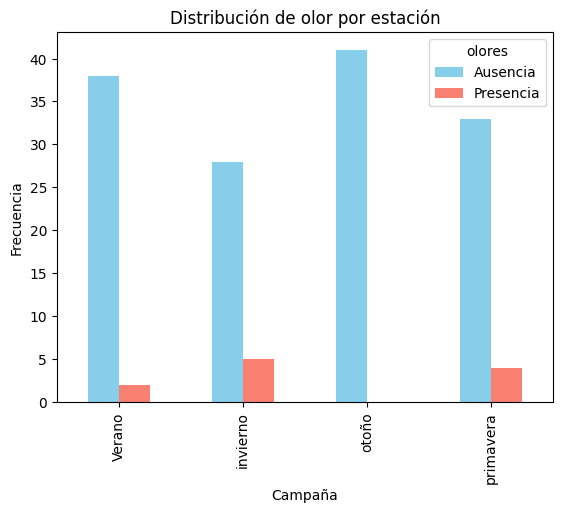

In [66]:
import pandas as pd
import matplotlib.pyplot as plt

contingency_table = pd.crosstab(base_completa['campaña'], base_completa['olores'])
contingency_table.plot(kind='bar', color=['skyblue', 'salmon'])
plt.xlabel('Campaña')
plt.ylabel('Frecuencia')
plt.title('Distribución de olor por estación')
plt.legend(title='olores', labels=['Ausencia', 'Presencia'])
plt.show()

Vemos que parece no haber un comportamiento estacional para la variable olores, asi que decidimos hacer la prueba de Chi-cuadrado (ya que las dos variables son cualitativas) para poder refutar la hipótesis.

In [67]:
from scipy.stats import chi2_contingency

#tabla de contingencia
contingency_table = pd.crosstab(base_completa['campaña'], base_completa['olores'])

#chi-cuadrado
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Estadístico chi-cuadrado: {chi2}")
print(f"Valor p: {p}")
print(f"Grados de libertad: {dof}")
print("Tabla de valores esperados:")
print(expected)

alpha = 0.05
if p < alpha:
    print("Se rechaza la hipótesis nula: Existe una asociación significativa entre olores y campaña.")
else:
    print("No se rechaza la hipótesis nula: No hay evidencia suficiente de asociación entre olores y campaña.")

Estadístico chi-cuadrado: 7.235374506738141
Valor p: 0.06476221310813503
Grados de libertad: 3
Tabla de valores esperados:
[[37.08609272  2.91390728]
 [30.59602649  2.40397351]
 [38.01324503  2.98675497]
 [34.30463576  2.69536424]]
No se rechaza la hipótesis nula: No hay evidencia suficiente de asociación entre olores y campaña.


**La H6 no puede ser validad ni refutada.** No podemos determinar que el olor del agua del Rio de la Plata tiene un comportamiento estacional, no contabamos con suficientes datos del tipo "presencia".

Sin embargo, tal vez la materia fecal suspendida puede llegar a tener un comportamiento estacional, ya que por las hipótesis H4 sabemos que algunas bacterias fecales influyen en la cantidad de materia fecal en el agua y que además las coliformes fecales tienen un comportamiento estacional.

**H7: ¿La materia fecal suspendida en el agua tiene un comportamiento estacional?**

Nuevamente realizamos un gráfico de barras.

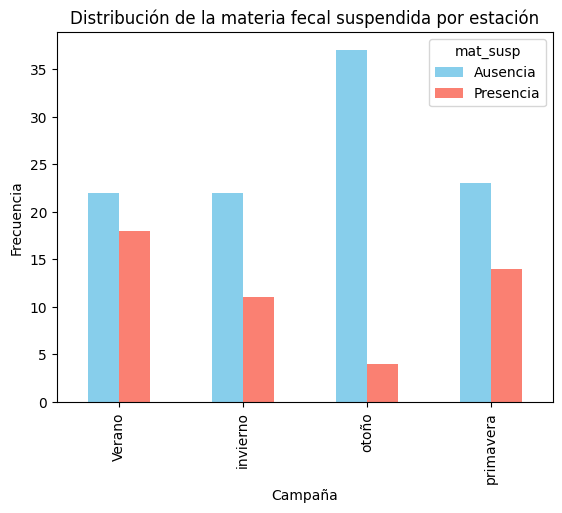

In [68]:
import pandas as pd
import matplotlib.pyplot as plt

contingency_table = pd.crosstab(base_completa['campaña'], base_completa['mat_susp'])
contingency_table.plot(kind='bar', color=['skyblue', 'salmon'])
plt.xlabel('Campaña')
plt.ylabel('Frecuencia')
plt.title('Distribución de la materia fecal suspendida por estación')
plt.legend(title='mat_susp', labels=['Ausencia', 'Presencia'])
plt.show()

Contamos con más datos en mat_susp y parece haber un posible comportamiento. Nuevamente aplicamos la prueba de Chi-cuadrado.

In [69]:
from scipy.stats import chi2_contingency

#tabla de contingencia
contingency_table = pd.crosstab(base_completa['mat_susp'], base_completa['campaña'])

#chi-cuadrado
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Estadístico chi-cuadrado: {chi2}")
print(f"Valor p: {p}")
print(f"Grados de libertad: {dof}")
print("Tabla de valores esperados:")
print(expected)

alpha = 0.05
if p < alpha:
    print("Se rechaza la hipótesis nula: Existe una asociación significativa entre mat_susp y campaña.")
else:
    print("No se rechaza la hipótesis nula: No hay evidencia suficiente de asociación entre mat_susp y campaña.")

Estadístico chi-cuadrado: 13.178067422638
Valor p: 0.004266929268524758
Grados de libertad: 3
Tabla de valores esperados:
[[27.54966887 22.72847682 28.2384106  25.48344371]
 [12.45033113 10.27152318 12.7615894  11.51655629]]
Se rechaza la hipótesis nula: Existe una asociación significativa entre mat_susp y campaña.


**La H7 queda validada.**